## **Tesla's Stock Data, Analysis and Machine Learning predictions by Lucio Awa**

#### Source of data: [Kaggle](https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021)

In [4]:
# Importa data
import pandas as pd

df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


**____________________________________________________________________________________________________________________________________________________**

## **I. Data Analysis**

#### Queries to be performed on Tesla's stock data from 6/29/10 to 3/24/22:

1. Basic Summary Statistics
2. Yearly Average Closing Prices
3. Highest Volume in a day with corresponding Maximum Volume for each year
4. 10-day moving average of closing prices around Tesla's Highest Volume day
5. Days with Significant Price Change around Tesla's Highest Volume day
6. Yearly Low and High range of Tesla's stock prices
7. Volume and Close Price Correlation

#### Format of Analysis for each query:

1. SQL Queries
2. Python with Pandas DatraFrame
3. Matplotlib / Seaborn Visualization
4. Insights gained from Data Analysis

## **II. Machine Learning model**

#### **A. Forming a hypothesis: Predict Tesla's stock price** 

A statement to be proved with data based on a specific stock strategy.

#### **B. Finding the data**

The Tesla's stock data we're going to be using is found at: [Kaggle](https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021)

#### **C. Reshaping the data**

1. Setting the 'Date' column as the index of our DataFrame
2. Visualizing Tesla's stock market data
3. Setting up a target to get predictions using our Machine Learning Model
    * Create a new column named 'tomorrow'
    * Create a new column named 'target'
  
#### **D. Cleaning the data**

1. Remove columns we won't use in our model
2. Remove any missing values for our model to work efficiently
3. Remove any historical data that is too old to make predictions, the market could've shifted  
   fundamentally making this data redundant. 

#### **E. Building a Machine Learning Model and splitting the data**

1. Training an initial baseline Machine Learning model
    * Define model parameters
    * Create a Random Forest Classifier meta estimator
    * Split the data into training and testing sets
    * Define Predictors
    * Fit the model using the specified predictors
  
#### **F. Finding an error metric**

1. Measure how accurate our Machine Learning Model is 
    * Calculating a Precision Score
    * Plotting our Predictions
    * Insights based on our Predictions
  
#### **G. Backtesting our model**

1. Creating a prediction function
2. Creating a rolling window backtest function
3. Calling the backtest function
4. Evaluating the error of our predicions
5. Insights based on the frequency of our predictions
6. Evaluating precision score and performance of our machine learning model
7. Insights based on our Precision Score
8. Evaluating our percentage of Up/Down days
9. Insights based on our percentage of Up/Down days
     
#### **H. Feature Enginnering**

1. Adding more predictors within a specified window [2,5,60,250,1000 days] to improve accuracy  
2. Getting rid of extra NaN (Not-a-Number) columns and addressing error 
    
#### **I. Hyper-parameter Tuning**
    
1. Redefining hyper-parameters for the Random Forest Algorithm 
2. Predict Function Refinement
3. Backtesting Iteration

#### **J. Comparison of results using different values for our rolling window backtest**

1. Using start=2500 and step=250
2. Using start=1000 and step=100
3. Using start=500 and step=250

#### **K. Conclusion of our Backtests**

#### **L. Next Steps to Improve Machine Learning Model**

**____________________________________________________________________________________________________________________________________________________**


### **I**. **Data Analysis** 

Tesla's stock data from 6/29/10 to 3/24/22

### **Query 1. Basic Summary Statistics**

### 1. SQL Query:

This query calculates and retrieves summary statistics for the 'Close' prices of Tesla stock from the Tesla_Stock_Prices   
table in USD, limiting the results to only two decimal points.  

* **SELECT**  
    * **ROUND(MIN(Close),2) AS Min_Close,** -- Minimum value of 'close' column  
    * **ROUND(MAX(Close), 2) AS Max_Close,** -- Maximum value of 'close' column  
    * **ROUND(AVG(Close), 2) AS Avg_Close,** -- Average (mean) value of 'close' column  
    * **ROUND(STDDEV(Close), 2) AS Std_Dev_Close** -- Standard deviation  value of 'close' column, a measure of how spread out   
    the closing prices are from the average   
* **FROM Tesla_Stock_Prices;** - - Data retrieved from this specific table  

### 2. Python with Pandas

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

min_close = df['Close'].min()
max_close = df['Close'].max()
avg_close = df['Close'].mean()
std_dev_close = df['Close'].std()

# Define stat_labels and stat_values
stat_labels = ['Min Close', 'Max Close', 'Avg Close', 'Std Dev Close']
stat_values = [min_close, max_close, avg_close, std_dev_close]

# Print the statistics
print(f"Min Close: {min_close:.2f}")
print(f"Max Close: {max_close:.2f}")
print(f"Avg Close: {avg_close:.2f}")
print(f"Std Dev Close: {std_dev_close:.2f}")

Min Close: 3.16
Max Close: 1229.91
Avg Close: 138.76
Std Dev Close: 250.12


### 3. Horizontal Bar Plot Visualization

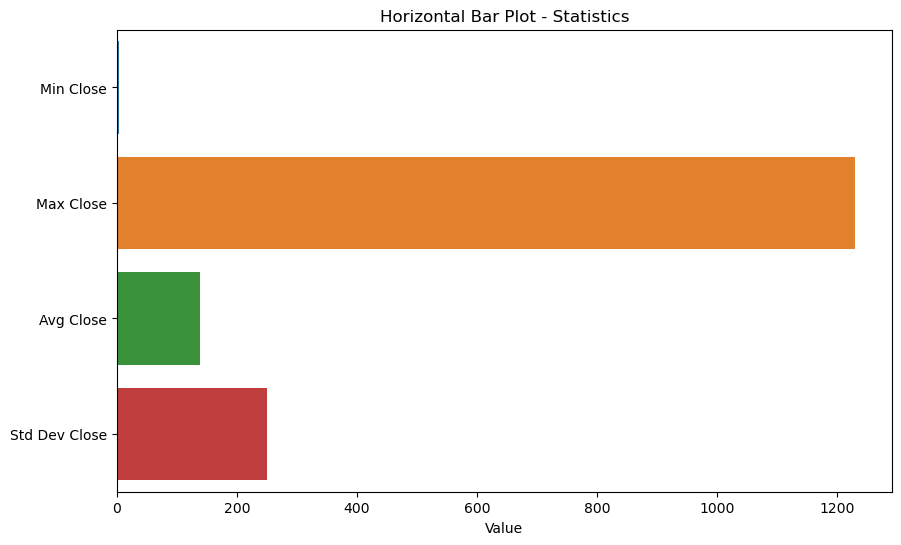

In [5]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=stat_values, y=stat_labels, orient='h')
plt.title('Horizontal Bar Plot - Statistics')
plt.xlabel('Value')
plt.show()

### 4. Insights from Basic Summary Statistics

**1. Significant Price Range:** Tesla's stock has experienced both substantial growth and volatility.

**2. Long-Term Growth:** From $3.16 to $1229.91, it indicates a significant long-term growth in the value of the company.   
Investors who held Tesla stock from the start of the period would have seen substantial appreciation in their   
investments.

**3. Volatility:** The wide range between the minimum and maximum prices indicates that Tesla's stock is characterized by   
significant volatility. Such volatility can present both opportunities and risks for investors. It suggests that the   
stock has experienced periods of rapid price changes, which could be influenced by various market factors, news, and   
company developments.

**4. Market Sentiment and External Factors:** The price fluctuations may reflect changes in market sentiment, investor   
perceptions, macroeconomic conditions, and other external factors that impact Tesla's stock. The company's performance,   
product launches, earnings reports, regulatory news, and technological advancements may have contributed to these   
fluctuations.

**5. Investor Behavior:** The large price range suggests that Tesla's stock has attracted a diverse range of investors,   
including those seeking short-term trading opportunities and those with a long-term investment perspective. Different   
investors may have reacted differently to news and events, contributing to the price volatility.

**6. Potential for Gains and Losses:** The wide range of prices implies that there have been opportunities for investors to   
make significant gains or losses depending on their timing of buying and selling. Traders and investors who correctly   
predicted market trends could have profited from these price movements.

**7. Historical Context:** Consider comparing the stock's price movements to significant events in the company's history,   
such as product launches, earnings announcements, and industry trends. This can help provide a contextual understanding   
of why certain price movements occurred.

**8. Risk Management:** Investors and analysts need to be aware of the potential risks associated with such price volatility.   
Volatile stocks can pose challenges for risk management and require careful evaluation and diversification strategies.

**9. Average Closing Price (Avg_Close):** The average closing price of $138.76 represents the typical value of Tesla's stock   
price over the dataset's time period. It provides a general overview of the stock's performance and trend. Keep in mind   
that the average can be influenced by extreme values (outliers) in the data.

**10. Standard Deviation of Closing Price (Std_Dev_Close):** The standard deviation of $250.12 indicates the amount of   
variability or dispersion in Tesla's closing stock prices. A higher standard deviation suggests that the closing prices   
have fluctuated significantly from the average. In other words, the stock prices have experienced relatively large   
deviations from the mean, which may indicate higher volatility in the stock. The stock has experienced periods of both   
increased gains and losses.

**__________________________________________________________________________________________________________________________________________________**  

### **Query 2. Yearly Average Closing Prices:**

### 1. SQL Query:

This query performs an analysis on the Tesla stock data, from 6/29/10 to 3/24/22, to calculate the average closing price       
for each year.

* **SELECT**
    * **DATE_TRUNC('year', Date) AS Year,** -- The ‘DATE_TRUNC’ function truncates the ‘Date’ to a level of precision, in  
    this case to the ‘year’ level. The result is displayed as a new column named ‘Year’’ in the output.  
    * **ROUND(AVG(Close), 2) AS Avg_Close** -- The average closing price for all rows within each truncated year, rounded  
    to 2 decimals. The result is displayed as a new column named Avg_Close in the output.
* **FROM Tesla_Stock_Prices**
* **GROUP BY Year** -- Groups the data by the ‘Year’ column created using ‘DATE_TRUNC’. This is essential when you want to   
    aggregate data (e.g., calculate averages) for distinct groups.  
* **ORDER BY Year;** -- Sorts the results in ascending order based on the ‘Year’ column. This ensures that the output  
    displays the results in chronological order.

### 2. Python with Pandas:

In [9]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'Year' by truncating the 'Date' to the year level
df['Year'] = df['Date'].dt.year

# Calculate the yearly average closing prices and round to 2 decimal places
yearly_avg_close = df.groupby('Year')['Close'].mean().round(2)

# Create a new DataFrame to store the results
yearly_avg_df = pd.DataFrame({'Year': yearly_avg_close.index, 'Avg_Close': yearly_avg_close.values})

# Print the DataFrame with yearly average closing prices
print(yearly_avg_df)

    Year  Avg_Close
0   2010       4.67
1   2011       5.36
2   2012       6.23
3   2013      20.88
4   2014      44.67
5   2015      46.01
6   2016      41.95
7   2017      62.86
8   2018      63.46
9   2019      54.71
10  2020     290.00
11  2021     779.99
12  2022     922.09


### 3. Seaborn visualization

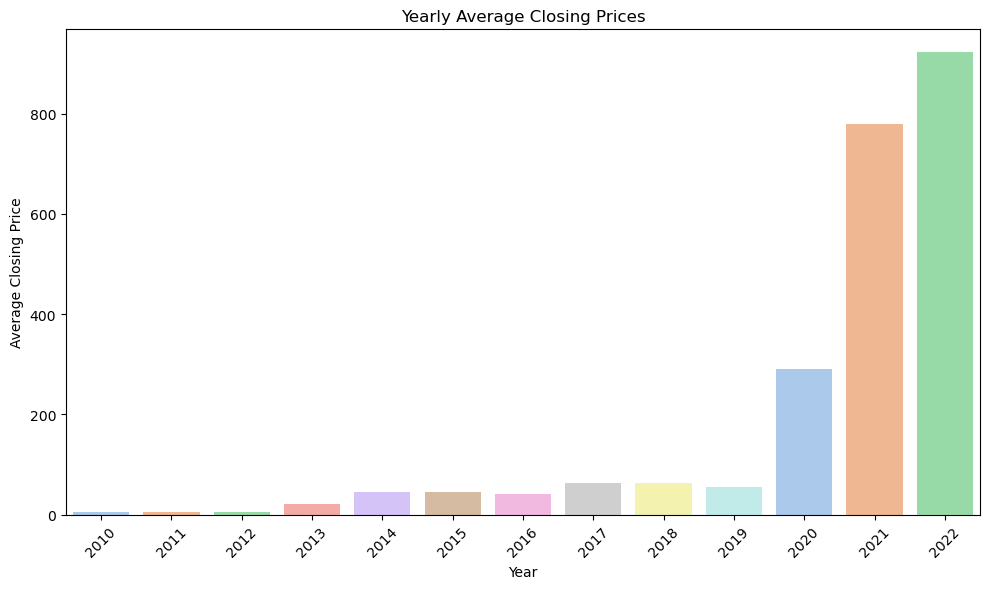

In [10]:
# Create a Seaborn visualization
# The visualization is a bar plot with years on the x-axis and average closing prices on the y-axis, which should 
# provide a clear representation of the yearly trends in average closing prices.

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Avg_Close', data=yearly_avg_df, palette='pastel')
plt.title('Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Insights from Yearly Average Closing Prices

**1. Early Growth Phase (2010-2013):** During the initial years from 2010 to 2013, Tesla's stock averaged relatively   
low closing prices, gradually increasing over the years. This suggests a period of early growth and development for   
the company.

**2. Rapid Growth and Expansion (2014-2017):** From 2014 to 2017, there was a substantial increase in the average  
closing price, indicating a period of rapid growth and expansion for Tesla. This could be attributed to successful   
product launches, increased demand, and positive market sentiment.

**3. Stabilization (2018-2019):** The average closing price remained relatively stable from 2018 to 2019. This could   
indicate a period of consolidation and market maturity as the company worked to maintain its position and manage   
investor expectations.

**4. Explosive Growth (2020-2021):** The years 2020 and 2021 saw a remarkable surge in the average closing price, with    
an exponential increase in value. This period corresponds to significant milestones, such as Tesla's inclusion in the  
S&P 500 index, continued growth in electric vehicle adoption, and high investor enthusiasm.

**5. Continued Strong Performance (2022):** The average closing price in 2022 remains notably high, demonstrating that   
Tesla's stock has maintained a strong performance and investor interest.

**6. Market Sentiment and Events:** The fluctuations in average closing prices across the years suggest that market     
sentiment and external events have played a significant role in driving Tesla's stock performance. Positive news,   
product launches, financial results, and technological advancements likely influenced these fluctuations.

**7. Investor Behavior:** The considerable variations in average closing prices from year to year reflect changes in   
investor behavior, sentiment, and expectations. The years of explosive growth indicate periods of high investor   
optimism and demand.

**8. Volatility and Risk:** The wide range of average closing prices over the years indicates that Tesla's stock has   
experienced considerable volatility. While this volatility presents opportunities for gains, it also poses risks for   
investors due to potential rapid price swings.

**9. Long-Term Growth Trend:** Despite short-term fluctuations, the general trend suggests that Tesla's stock has   
experienced long-term growth since its inception, with particularly notable periods of acceleration.

**__________________________________________________________________________________________________________________________________________________**

### **Query 3. Highest Volume in a day with corresponding Maximum Volume for each year**

### 1. SQL Query:

The SQL query uses a CTE (Common Table Expression) to calculate the rank of trading volumes within each year and then   
selects the rows where the rank is 1, indicating the days with the highest trading volume for each year. The results   
include the year, date, and corresponding volume.

* **WITH RankedByVolume AS (**
    * **SELECT**  
            * **Date,** -- Selects the trading date    
            * **EXTRACT(YEAR FROM Date) AS Year,** -- Extracts the year from the date and assigns it as the 'Year' column    
            * **Volume,** -- Selects the trading volume for that date    
            * **RANK() OVER (PARTITION BY EXTRACT(YEAR FROM Date) ORDER BY Volume DESC) AS VolumeRank** -- Calculates the     
                rank of each day's volume within the same year    
    * **FROM Tesla_Stock_Prices**  
* **)**   
* **SELECT**   
        * **Year,** -- The year extracted from the date    
        * **Date AS Highest_Volume_Day,** -- The trading date itself    
        * **Volume AS Max_Volume** -- The trading volume for that day    
* **FROM RankedByVolume**  
* **WHERE VolumeRank = 1** -- Filter the results to include only rows where the 'VolumeRank' is equal to 1, corresponding     
    to the highest trading volume for each year  
* **ORDER BY Year** -- Orders results by the 'Year' column in ascending order

### 2. Python with Pandas:

In [11]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a Common Table Expression (CTE) named 'RankedByVolume'
ranked_by_volume = (
    df.assign(Year=df['Date'].dt.year)
    .sort_values(by=['Year', 'Volume'], ascending=[True, False])
    .assign(VolumeRank=lambda x: x.groupby('Year').cumcount() + 1)
    .query('VolumeRank == 1')
    [['Year', 'Date', 'Volume']]
)

# Print the DataFrame with highest volume days and maximum volumes
print(ranked_by_volume)

# Create a Seaborn visualization
plt.figure(figsize=(10, 6))

# Generate a color palette with a different color for each bar
colors = sns.color_palette("tab10", n_colors=len(ranked_by_volume['Year'].unique()))

      Year       Date     Volume
0     2010 2010-06-29   93831500
191   2011 2011-03-31   57589000
566   2012 2012-09-25   28402000
723   2013 2013-05-14  185819500
920   2014 2014-02-25  163408500
1164  2015 2015-02-12   78248000
1506  2016 2016-06-22  118712000
1851  2017 2017-11-02   98957000
2078  2018 2018-09-28  168248500
2348  2019 2019-10-25  150030500
2416  2020 2020-02-04  304694000
2689  2021 2021-03-05   89396500
2913  2022 2022-01-24   50521900


<Figure size 1000x600 with 0 Axes>

### 3. Seaborn Bar Plot

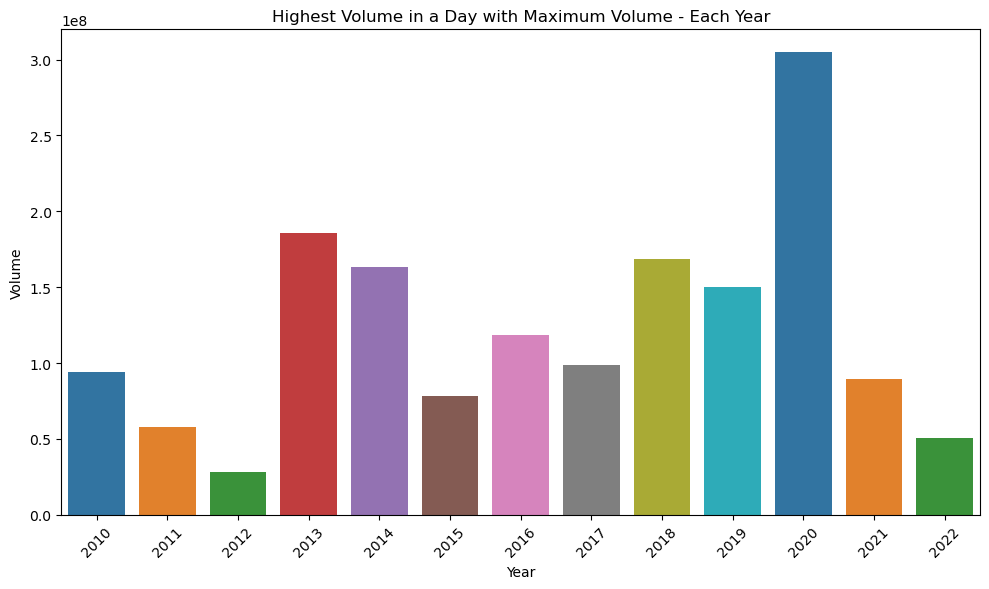

In [13]:
# Bar plot with years on the x-axis and volume on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Volume', data=ranked_by_volume, palette=colors)
plt.title('Highest Volume in a Day with Maximum Volume - Each Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Insights for Highest Volume in a day with Maximum Volume for each year

The following results are shown in the context of some of the main global financial events from 2010 to 2022, along   
with Elon’s Tesla and his other companies’ main financial events. These results provide insights into how these   
events might have influenced Tesla's stock trading activity. 

##### Results divided into: 

- Query results
- Global financial event
- Tesla related event
- Relation


The observed patterns of maximum trading volume for Tesla's stock on specific dates and in particular years can be   
attributed to the interplay of global financial events, Elon Musk's companies' developments, and broader market   
dynamics.

Instances of uncertainty, market shifts, and emerging investment prospects likely fueled heightened trading activity.   
Significant announcements, milestones, and strategic decisions made by Elon Musk and his companies acted as catalysts   
for investor interest in Tesla's stock. Furthermore, the synergy between broader market sentiment, investor behavior,   
and the convergence of global financial events with specific company advancements collectively influenced the   
observed trends in maximum trading volume.

**1. June 30, 2010 - Volume: 93,831,500:**

**Global financial event:** 2010 (European Debt Crisis)

**Tesla related event:** Tesla went public on June 29, 2010, with an IPO price of $17 per share. High volume could   
have been influenced by anticipation around product developments, early investor interest, or news related to electric   
vehicle technology.

**Relation:** The European Debt Crisis caused market volatility and uncertainty globally. This environment might have   
affected investor sentiment around Tesla's IPO, potentially contributing to higher trading volume on the IPO day.


**2. March 31, 2011 - Volume: 57,589,000:**

**Global financial event:** U.S. Credit Rating Downgrade - Standard & Poor's downgraded the United States' credit   
rating from AAA to AA+, citing concerns about the U.S. government's ability to manage its debt.

**Tesla related event:** Tesla continued to develop electric vehicles, potentially driving interest and trading volume.

**Relation:** The U.S. Credit Rating Downgrade event likely had broader implications for market sentiment, causing   
investors to seek opportunities in innovative sectors that could weather economic challenges. Tesla's focus on   
electric vehicles aligned with long-term sustainability goals, and its progress in this area could have provided a   
counterbalance to the uncertainty caused by the credit rating downgrade. As investors sought avenues for potential   
growth amidst market turbulence, Tesla's electric vehicle development could have garnered attention and contributed   
to the observed trading volume on March 31, 2011.


**3. September 25, 2012 - Volume: 28,402,000:**

**Global financial event:** European Central Bank's Outright Monetary Transactions (OMT) - The ECB announced its plan   
to potentially buy unlimited amounts of sovereign debt from struggling eurozone countries to stabilize their bond   
markets.

**Tesla related event:** Dragon's First Commercial Resupply Mission: In May 2012, SpaceX's Dragon spacecraft became the   
first commercial spacecraft to deliver cargo to the International Space Station (ISS), marking a significant milestone   
for commercial spaceflight.

**Relation:** The European Central Bank's OMT announcement could have contributed to a broader sense of optimism in   
financial markets, especially regarding potential solutions to the eurozone crisis. Investors may have been more open   
to considering innovative and forward-looking investments, such as those associated with companies like Tesla and   
SpaceX, which represented disruptive technologies and commercial space endeavors. The success of SpaceX's Dragon   
mission highlighted the advancements in private spaceflight and contributed to the perception of SpaceX as a   
trailblazer in the aerospace industry. This positive sentiment, coupled with the broader market context, might have   
influenced trading activity and contributed to the observed trading volume on September 25, 2012.


**4. May 14, 2013 - Volume: 185,819,500:**

**Global financial event:** Taper Tantrum - The U.S. Federal Reserve announced its intention to reduce its bond-buying   
program, leading to a surge in global interest rates and volatility in emerging markets.

**Tesla related event:** First Profitable Quarter. Tesla reported its first-ever profitable quarter in Q1 2013, a   
milestone that was seen as a turning point for the company's financial viability.

**Relation:** The Taper Tantrum had widespread effects on financial markets, with investors seeking safe havens and   
reevaluating their investment strategies. Against this backdrop, Tesla's announcement of a profitable quarter could   
have been interpreted as a beacon of stability and resilience amid market turbulence. The achievement of profitability   
demonstrated that Tesla's business model was maturing and had the potential to weather economic uncertainties. This   
positive news could have attracted increased investor attention and contributed to the observed trading volume on May   
14, 2013. The contrasting narratives of market volatility and Tesla's financial success might have created a scenario   
where investors sought out companies that exhibited signs of strength and growth, influencing the trading activity of   
Tesla's stock.


**5. February 25, 2014 - Volume: 163,408,500:**

**Global financial event:** Oil Price Collapse - The price of oil plummeted from around $100 per barrel to below $50   
per barrel, due to factors like oversupply and weak global demand.

**Tesla related event:** Gigafactory Announcement: In February 2014, Tesla announced plans to build a Gigafactory, a   
massive battery production facility aimed at reducing the cost of batteries and enabling mass production of electric   
vehicles.

**Relation:** The Oil Price Collapse had broader implications for market sentiment, with investors reevaluating sectors   
affected by oil prices. In this context, Tesla's announcement of the Gigafactory may have been perceived as a strategic   
move to secure the company's supply chain and long-term growth prospects, regardless of energy market fluctuations.   
Tesla's plans to reduce battery costs and enable mass EV production aligned with sustainability and innovation trends,   
potentially making it an attractive investment opportunity amidst concerns about traditional energy markets. The   
combination of the oil price collapse and Tesla's innovative plans could have led to increased investor attention and   
trading activity on February 25, 2014. The positive narrative around Tesla's future growth and the company's strategic   
decisions could have stood out in a market environment influenced by energy sector challenges.


**6. February 12, 2015 - Volume: 78,248,000:**

**Global financial event:** Chinese Stock Market Crash - The Chinese stock market experienced a major crash, with the   
Shanghai Composite Index losing around 30% of its value in a short period, prompting government interventions to   
stabilize the market.

**Tesla related event:** Tesla made a big push into energy when it unveiled the Powerpack and Powerwall at an event in   
Hawthorne, California.

**Relation:** The Chinese Stock Market Crash created global market volatility and prompted investors to reassess their   
exposure to riskier assets. Against this backdrop, Tesla's announcement of its Powerpack and Powerwall signaled a   
strategic expansion into the energy sector, potentially appealing to investors seeking resilient and innovative   
companies. Tesla's move into energy storage aligned with global sustainability trends and diversification away   
from traditional energy sources. This expansion might have garnered increased attention from investors looking for   
companies positioned to address emerging challenges in energy and environmental sustainability. The combination of   
global market concerns and Tesla's innovative energy solutions could have influenced trading activity and   
contributed to the observed trading volume on February 12, 2015.


**7. June 22, 2016 - Volume: 118,712,000:**

**Global financial event:** Brexit Referendum - The United Kingdom voted to leave the European Union, causing   
significant uncertainty in financial markets and impacting the value of the British pound.

**Tesla related event:** In 2016, Tesla became the world's first vertically-integrated sustainable energy company with   
the acquisition of SolarCity, the leading provider of solar power systems in the United States.

**Relation:** The Brexit Referendum triggered uncertainty and volatility in global financial markets, with investors   
seeking stability amidst geopolitical developments. In this context, Tesla's acquisition of SolarCity could have   
been perceived as a move to strengthen the company's long-term sustainability initiatives, offering an opportunity   
for investors to engage with a company at the forefront of both electric vehicles and renewable energy. Tesla's   
integrated approach resonated with global trends towards environmental responsibility and energy independence. The   
combination of a tumultuous global event like Brexit and Tesla's strategic expansion could have attracted heightened   
investor attention and contributed to the observed trading volume on June 22, 2016. The contrasting narratives of   
geopolitical uncertainty and Tesla's expansion into renewable energy might have influenced trading activity by   
offering investors an avenue for potential growth and alignment with sustainable values.


**8. November 2, 2017 - Volume: 98,957,000.00:**

**Global financial event:** Bitcoin Rally - The price of Bitcoin and other cryptocurrencies experienced a dramatic   
surge, attracting widespread attention and speculation in the market.

**Tesla related event:** The successful launch and landing of the Falcon Heavy rocket by SpaceX. Its maiden flight  
took place on February 6, 2018, but the development and preparations for the launch occurred throughout 2017.

**Relation:** The Bitcoin Rally drew attention from investors and the media, reflecting the growing interest in   
alternative forms of investment and financial technology innovation. Against this backdrop, SpaceX's achievement   
in launching and landing the Falcon Heavy rocket highlighted the potential for private companies to reshape the   
aerospace sector. These events showcased disruptive technological advancements that could have attracted investors   
looking for transformative opportunities beyond traditional markets. The Bitcoin Rally's association with   
technology-driven financial speculation and the Falcon Heavy's demonstration of SpaceX's pioneering spirit could   
have created a scenario where investors sought exposure to innovative companies like Tesla. The combination of these   
narratives could have contributed to the observed trading volume on November 2, 2017, as investors looked for   
opportunities in emerging technologies and industries.Pre-US-China Trade War could have influenced Tesla's   
international operations and investor sentiment.


**9. September 28, 2018 - Volume: 168,248,500.00:**

**Global financial event:** Trade War - The United States and China engaged in a series of tit-for-tat tariff     
announcements, sparking fears of a global trade war and affecting international trade and supply chains.

**Tesla related event:** Tesla was added to the S&P 500 index, further solidifying its status as a major player   
in the stock market.

**Relation:** The Trade War between the United States and China had far-reaching implications for international   
trade and investment. The uncertainty generated by the trade tensions prompted investors to reassess their   
portfolios and seek stability. In contrast, Tesla's inclusion in the S&P 500 index highlighted the company's   
growth trajectory and market influence. The addition to the index represented a vote of confidence in Tesla's   
long-term prospects and positioned the company as a substantial player in the stock market. Amidst concerns   
about global trade disruptions, Tesla's presence in the S&P 500 could have been perceived as a resilient   
investment option with potential for consistent growth. The combination of trade tensions and Tesla's   
recognition as a significant market player could have contributed to heightened trading activity on September   
28, 2018, as investors evaluated opportunities in the context of evolving global economic dynamics.


**10. October 25, 2019 - Volume: 150,030,500.00:**

**Global financial event:** Repo Market Turmoil - The U.S. repurchase agreement (repo) market experienced a   
liquidity squeeze, leading to a spike in short-term interest rates and prompting interventions by the Federal   
Reserve to stabilize the market.

**Tesla related event:** Further developments related to Tesla's electric vehicles and energy products.

**Relation:** The Repo Market Turmoil signaled potential vulnerabilities in short-term funding markets and   
underscored the importance of central bank interventions to maintain financial stability. Amidst these concerns,   
Tesla's ongoing developments in electric vehicles and energy products could have presented a counter-narrative   
of innovation and resilience. As the automotive industry faced challenges related to sustainable mobility, Tesla's   
advancements might have resonated with investors seeking exposure to companies driving technological disruption and   
environmental sustainability. The contrast between market turbulence and Tesla's trajectory as a technology-driven   
company could have attracted trading activity on October 25, 2019. Investors looking for opportunities in sectors       
poised for transformation might have viewed Tesla as a compelling option, given its role in reshaping 
transportation   
and energy systems for the future.


**11. February 4, 2020 - Volume: 304,694,000.00:**

**Global financial event:** COVID-19 Pandemic - The global pandemic caused by the spread of the novel coronavirus led   
to widespread lockdowns, economic disruptions, and financial market volatility.

**Tesla related event:** Tesla disclosed a $1.5 billion investment in Bitcoin.

**Relation:** The COVID-19 Pandemic triggered a period of unprecedented market turmoil and uncertainty. As economies   
grappled with the effects of lockdowns and the potential long-term impacts of the pandemic, investors sought safe   
havens and assets with potential for value preservation. In this context, Tesla's disclosure of a significant   
Bitcoin investment could have added a layer of complexity to its financial strategy. The move could have been   
perceived as an attempt to diversify assets or capitalize on potential opportunities in the cryptocurrency space.   
The contrast between the global health crisis and Tesla's exploration of unconventional investment avenues could   
have attracted investor attention on February 4, 2020. Investors navigating the uncertainties of the pandemic might   
have viewed Tesla's strategic decisions as a reflection of its forward-looking approach and ability to adapt to   
changing market dynamics. The combination of these narratives could have contributed to the observed trading   
volume, as investors evaluated Tesla's potential resilience and growth prospects amidst a complex and rapidly   
evolving global environment.


**12. March 5, 2021 - Volume: 89,396,500.00:**

**Global financial event:** GameStop Short Squeeze - Retail investors organized through online forums like Reddit's   
WallStreetBets drove up the stock price of GameStop and other heavily shorted companies, causing major losses for   
some hedge funds.

**Tesla related event:** On January 7, 2021, Elon Musk's ascent to becoming the wealthiest person in the world,   
according to Bloomberg, underscored the impact of his achievements across Tesla and other ventures. His wealth   
ranking highlighted his influential role in shaping industries such as electric vehicles, space travel, and   
technology.

**Relation:** The GameStop Short Squeeze symbolized the power of retail investors to disrupt traditional market   
dynamics and challenge established financial institutions. The collective action of online communities demonstrated   
the potential for retail investors to influence stock prices and market sentiment, particularly for companies with   
high short interest. Against this backdrop, Elon Musk's rise to the position of the world's wealthiest person   
exemplified the influence of visionary leaders in shaping markets and industries. As the founder and leader of Tesla,   
his achievements and strategic decisions were closely tied to the company's stock performance. The convergence of   
these events could have prompted investors to consider the evolving landscape of financial markets, where individual   
actions and charismatic leadership could impact market dynamics. Investors might have assessed the implications of   
retail investor movements on Tesla's stock and its founder's position in the financial world. The combination of   
these narratives could have contributed to the observed trading volume on March 5, 2021, as investors navigated the   
intersection of individual-driven market forces and established market norms.


**January 24, 2022 - Volume: 50,521,900.00:**

**Global Financial Event:** Inflation Concerns - Rising inflation became a significant concern in many economies, as   
central banks grappled with the challenge of balancing economic growth and price stability.

**Tesla related event:** Musk acquires social media company Twitter in a $44 billion deal. His acquisition of Twitter    
marked a significant departure from his primary ventures in technology, electric vehicles, and space exploration.   
The acquisition underscored Musk's diverse interests and strategic vision for expanding his influence across various   
industries.

**Relation:** The concern over rising inflation represented a broader economic challenge that had implications for   
financial markets and investment decisions. Investors closely monitored central bank policies and economic indicators   
to gauge the potential impact of inflation on asset values and purchasing power. Amidst these discussions, Elon Musk's   
acquisition of Twitter signaled his interest in broader spheres beyond his well-known technological ventures. The   
acquisition might have raised questions about Musk's intentions and strategic objectives, potentially leading investors   
to assess the implications of this move on his broader business portfolio. The intersection of concerns over inflation   
and Musk's expansion into social media could have prompted investors to evaluate the resilience of Tesla's stock in the   
context of evolving economic dynamics and the founder's diverse interests. The combination of these narratives could   
have contributed to the observed trading volume on January 24, 2022, as investors considered the potential impact of   
macroeconomic trends and the implications of Musk's strategic decisions on Tesla's future prospects.

**__________________________________________________________________________________________________________________________________________________**

### **Query 4. 10-day moving average of closing prices around Tesla's Highest Volume day**

### 1. SQL Query: 

The 10-day moving average is a commonly used technical analysis tool in finance to smooth out price data   
over a 10-day period and provide a clearer picture of the underlying trend. 

This query provides 10 rows as a result around the date 2020-02-04, which is the highest volume day in Tesla's 
history.  
These results are used to identify short-term trends and potential reversal points.

* **SELECT** -- Selects specific columns to display in the query result.  
    * **Date,** -- date of the stock price data
    * **ROUND(Close, 2) AS Close,** -- rounds results to 2 decimal places. represents closing price of  
        Tesla’s stock on that date and renames column as ‘close’
    * **ROUND(AVG(Close) OVER (ORDER BY Date ROWS BETWEEN 9 PRECEDING AND CURRENT ROW), 2)   
        AS Moving_Avg_10_Days** -- This part rounds to 2 decimal places and calculates the moving average   
        of the ‘Close’ prices over a window of 10 days (including the current day) for each row.  
        -- ‘AVG(Close)’ calculates the average of the ‘close’ prices within the specified window ‘OVER’   
        Indicates that the following aggregation function (AVG in this case) will be applied to a window   
        of rows.   
        -- ORDER BY Date: Specifies that the window should be ordered by the ‘Date’ column.  
        -- ROWS BETWEEN 9 PRECEDING AND CURRENT ROW: Defines the range of rows to be included in the window.   
        It includes the 9 preceding rows and the current row, resulting in a total of 10 rows in the window.   
        This corresponds to the 10-day moving average.  
        -- AS Moving_Avg_10_Days: This renames the calculated moving average  
* **FROM Tesla_Stock_Prices** -- This indicates the source table from which we are retrieving data  
* **WHERE Date BETWEEN '2020-01-25' AND '2020-02-08'** -- Adjust the date range around 2020-02-04   
    (from 2020-01-25 to 2020-02-08). This ensures that the 10 rows include the 10 days around the specified   
    date.  
* **ORDER BY Date;** -- This specifies that the result should be ordered by the ‘date’ column in ascending   
    order.

### 2. Python with Pandas: 

In [14]:
# Imports necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date range around 2020-02-04
start_date = '2020-01-25'
end_date = '2020-02-08'
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame to include only rows within the date range
filtered_df = df[df['Date'].isin(date_range)].copy()  # Use .copy() to avoid the warning

# Calculate the 10-day moving average using rolling and mean functions
filtered_df['Moving_Avg_10_Days'] = filtered_df['Close'].rolling(window=10, min_periods=1).mean().round(2)

# Round the 'Close' column to 2 decimal places
filtered_df['Close'] = filtered_df['Close'].round(2)

# Select specific columns for the result
result_df = filtered_df[['Date', 'Close', 'Moving_Avg_10_Days']]

# Print the result
print(result_df)

           Date   Close  Moving_Avg_10_Days
2410 2020-01-27  111.60              111.60
2411 2020-01-28  113.38              112.49
2412 2020-01-29  116.20              113.73
2413 2020-01-30  128.16              117.34
2414 2020-01-31  130.11              119.89
2415 2020-02-03  156.00              125.91
2416 2020-02-04  177.41              133.27
2417 2020-02-05  146.94              134.98
2418 2020-02-06  149.79              136.62
2419 2020-02-07  149.61              137.92


### 3. Seaborn Line Plot Visualization

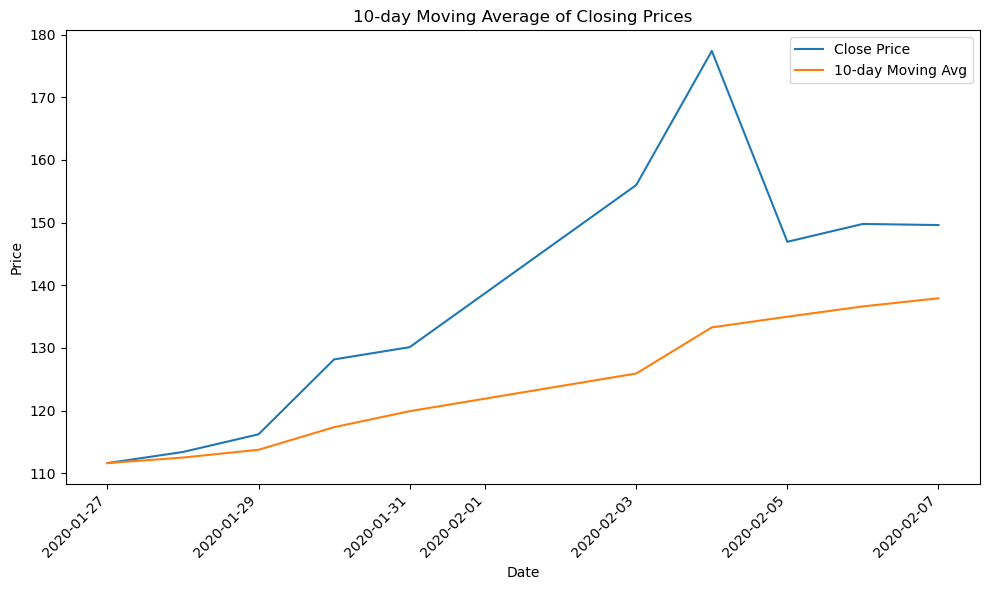

In [15]:
# Create a Seaborn line plot for visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=result_df, label='Close Price')
sns.lineplot(x='Date', y='Moving_Avg_10_Days', data=result_df, label='10-day Moving Avg')
plt.title('10-day Moving Average of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate the x-axis labels to prevent overlap of dates
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### 4. Insights for 10-day moving average of closing prices around Tesla's Highest Volume day

This query provides insight into the short-term trend by smoothing out day-to-day fluctuations and highlighting the   
general direction of the stock's price movement.

The results of the 10-day moving average calculation around the date 2020-02-04 provide valuable insights into the   
trend of Tesla's stock prices during that period. Here are some conclusions and insights that can be drawn from the   
data:

**1. Upward Trend:** The 10-day moving average generally shows an upward trend from January 27 to February 7. This   
indicates that the average closing price of Tesla's stock increased over this period.

**2. Significant Spike:** There is a significant spike in both the closing price and the moving average on 2020-02-04.   
This corresponds to the day with the highest volume in Tesla's history. The closing price on this day was $177.41,   
significantly higher than the previous days. This could indicate a significant event or news that impacted Tesla's   
stock price and trading activity.

**3. Volatility:** The closing prices exhibit significant fluctuations throughout this period, especially around the   
date with the highest volume. This suggests that there might have been rapid shifts in investor sentiment and   
trading activity during this time.

**4. Market Response:** The increase in the 10-day moving average leading up to 2020-02-04 could indicate that market   
participants were anticipating positive developments or news related to Tesla, which could have driven up stock   
prices. The subsequent drop in the moving average after 2020-02-04 suggests a potential market response or   
correction.

**5. Trading Patterns:** The divergence between the closing price and the moving average on 2020-02-05 and 2020-02-06   
suggests potential short-term volatility or trading patterns that might have influenced market participants'   
decisions.

**6. High Volume and Price Movement:** The fact that the day with the highest trading volume in Tesla's history,   
2020-02-04, also had a significant increase in both the closing price and the moving average highlights the strong   
relationship between trading activity and price movement.

In summary, the 10-day moving average analysis provides insights into the short-term trends and dynamics of Tesla's   
stock prices around the period of the highest trading volume in its history. It suggests that a notable event or   
news on 2020-02-04 had a substantial impact on both trading activity and price movement. The moving average trend   
leading up to and following this date can provide valuable context for understanding how market participants   
responded to this event.

**__________________________________________________________________________________________________________________________________________________**

### **Query 5. Days with Significant Price Change around Tesla's Highest Volume day**

### 1. SQL Query: 

Price change for Tesla's stock, rounding the results to 2 decimal places. The result is displayed in a   
new column named "Price_Change," showing how much the stock price changed from one day to the next, with   
the rounded value.

* **SELECT** -- select specific columns from the table  
    * **Date,** -- date of the stock price data  
    * **ROUND(Close, 2) AS Close,** -- close price rounded to 2 places renamed as Close  
    * **ROUND(Close - LAG(Close) OVER (ORDER BY Date), 2) AS Price_Change**  
        -- calculation of price change between consecutive days rounded to 2 decimals.   
        -- ‘Close’ is the current day’s closing price  
        -- ‘LAG(Close) OVER (ORDER BY Date)’ fetches the closing price of the previous day using the ‘LAG’   
        window function.  
        -- ‘Close - LAG(Close)’ calculates the price change from the previous day to the current day.  
* **FROM Tesla_Stock_Prices** -- from the Tesla table  
* **WHERE Date BETWEEN '2020-01-25' AND '2020-02-08'** -- This filters the data to focus the analysis   
    within the specified dates  
* **ORDER BY Date;** -- orders the resulting rows based on the ‘Date’ column in ascending order.

### 2. Python with Pandas: 

In [16]:
# Imports necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date range
start_date = '2020-01-25'
end_date = '2020-02-08'
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame
filtered_df = df[df['Date'].isin(date_range)].copy()

# Round the 'Close' column to 2 decimal places
filtered_df['Close'] = filtered_df['Close'].round(2)

# Calculate the price change between consecutive days
filtered_df['Price_Change'] = filtered_df['Close'] - filtered_df['Close'].shift(1)
filtered_df['Price_Change'] = filtered_df['Price_Change'].round(2)

# Select specific columns for the result
result_df = filtered_df[['Date', 'Close', 'Price_Change']]

# Print the result
print(result_df)

           Date   Close  Price_Change
2410 2020-01-27  111.60           NaN
2411 2020-01-28  113.38          1.78
2412 2020-01-29  116.20          2.82
2413 2020-01-30  128.16         11.96
2414 2020-01-31  130.11          1.95
2415 2020-02-03  156.00         25.89
2416 2020-02-04  177.41         21.41
2417 2020-02-05  146.94        -30.47
2418 2020-02-06  149.79          2.85
2419 2020-02-07  149.61         -0.18


### 3. Seaborn Visualization

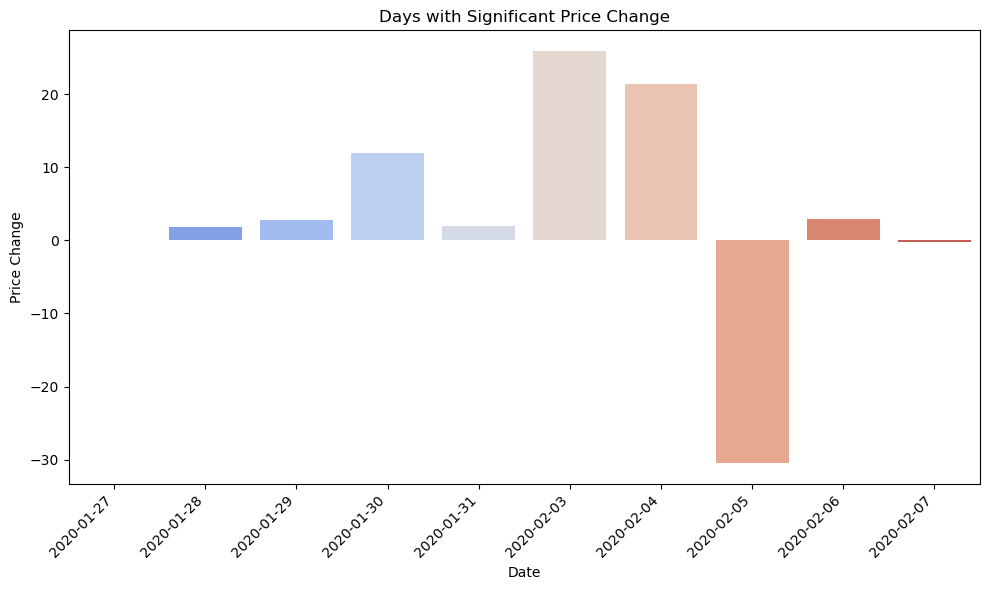

In [17]:
# Create a Seaborn visualization
# In this example, I've used a bar plot from Seaborn to visualize the days with significant price changes. The 
# palette='coolwarm' parameter provides a color gradient to the bars. The x-axis labels are rotated for better 
# readability using plt.xticks(rotation=45, ha='right'), and plt.tight_layout() is used to ensure the labels are 
# displayed without clipping.
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['Date'].dt.strftime('%Y-%m-%d'), y='Price_Change', data=result_df, palette='coolwarm')
plt.title('Days with Significant Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 4. Insights for Days with Significant Price Change around Tesla's Highest Volume day

Based on the provided results, we can observe the following conclusions and trends about the daily closing prices   
and the price changes between consecutive days:

**1. Increasing Trend at the Start:** The closing prices show a consistent upward trend from January 27 to January 31.   
This indicates a period of consecutive gains in the stock price.

**2. Significant Increase:** There is a notable jump in the closing price on February 3, 2020, with a price change of   
$25.89. This suggests a significant positive movement in Tesla's stock on this day.

**3. Highest Volume Day:** On February 4, 2020, the closing price experienced another substantial increase, reaching   
`$177.41`. This date also coincides with the highest trading volume day in Tesla's history. The stock price increased   
by `$21.41` compared to the previous day.

**4. Sharp Decrease:** Following the peak on February 4, there is a sharp drop in the closing price on February 5,   
resulting in a price change of -$30.47. This indicates a significant decline in Tesla's stock price.

**5. Minor Fluctuations:** In the subsequent days (February 6 and 7), the closing prices show relatively minor   
fluctuations, indicating a period of relative stability with small positive and negative changes.

Periods of both upward and downward trends in Tesla's stock prices during the specified time frame. The most   
significant price changes occurred around February 3 and February 4, with substantial increases in the stock price,   
followed by a sharp decrease on February 5. These patterns highlight the volatility and potential market sentiment   
shifts during this specific period.

**__________________________________________________________________________________________________________________________________________________**

### **Query 6. Yearly Low and High range of Tesla's stock prices**

### 1. SQL Query: 

This SQL code extracts the year from the "date" column, calculates the minimum "low" and maximum "high" values   
for each year from 2010 to 2022, and computes the yearly price range. The results are grouped by year and ordered   
by year in ascending order.

* **SELECT** -- select specific columns from the table  
    * **EXTRACT(YEAR FROM "date") AS Year,** -- This line uses the EXTRACT function to extract the year component     
        from the "date" column. 'AS Year' assigns an alias to the result of the extraction, renaming it to "Year."        
    * **ROUND(MIN(Low), 2) AS Yearly_Low,** -- the minimum value from the ‘Low’ column rounded to 2 decimal     
        places, aliased as ‘Yearly_Low’    
    * **ROUND(MAX(High), 2) AS Yearly_High** -- the maximum value from the ‘High’ column rounded to 2 decimal     
        places, aliased as ‘Yearly_High’    
    * **(MAX("high") - MIN("low")) AS Yearly_Range** --This line calculates the yearly range by subtracting the   
        minimum "low" value from the maximum "high" value, and renames it 'Yearly_Range'.  
* **FROM Tesla_Stock_Prices** -- specifies the table from which the data is retrieved    
* **GROUP BY Year** -- groups the data by the ‘Year’ column, which is the truncated and casted date column we     
    generated earlier.    
* **ORDER BY Year;** -- orders the results based on the ‘Year’ column in ascending order  

### 2. Python with Pandas: 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the "Date" column and round "Low" and "High" to 2 decimal places
df['Year'] = df['Date'].dt.year
df['Yearly_Low'] = df.groupby('Year')['Low'].transform('min').round(2)
df['Yearly_High'] = df.groupby('Year')['High'].transform('max').round(2)

# Calculate Yearly_Range and round it to 2 decimal places
df['Yearly_Range'] = (df.groupby('Year')['High'].transform('max') - df.groupby('Year')['Low'].transform('min')).round(2)

# Group by Year and select unique rows
result_df = df[['Year', 'Yearly_Low', 'Yearly_High', 'Yearly_Range']].drop_duplicates().sort_values(by='Year')

# Display the results
print(result_df)

      Year  Yearly_Low  Yearly_High  Yearly_Range
0     2010        3.00         7.28          4.29
130   2011        4.22         7.00          2.78
382   2012        4.53         7.99          3.46
632   2013        6.42        38.90         32.48
884   2014       27.33        58.28         30.95
1136  2015       36.28        57.33         21.05
1388  2016       28.21        53.87         25.66
1640  2017       42.19        77.92         35.73
1891  2018       48.92        77.49         28.57
2142  2019       35.40        87.06         51.66
2394  2020       70.10       718.72        648.62
2647  2021      539.49      1243.49        704.00
2899  2022      700.00      1208.00        508.00


### 3. Seaborn Matplotlib Visualization

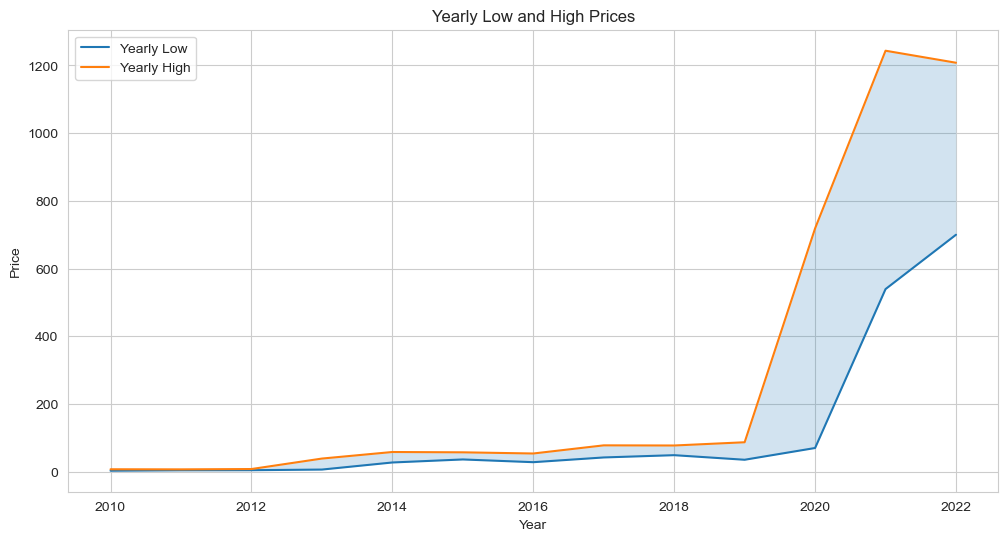

In [19]:
# Create a Seaborn Matplotlib visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=result_df, x='Year', y='Yearly_Low', label='Yearly Low')
sns.lineplot(data=result_df, x='Year', y='Yearly_High', label='Yearly High')
plt.fill_between(result_df['Year'], result_df['Yearly_Low'], result_df['Yearly_High'], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Low and High Prices')
plt.legend()
plt.show()

### 4. Insights for Yearly Low and High range of Tesla's stock prices

**1. Early Volatility and Growth (2010-2012):** In the early years (2010-2012), Tesla's stock experienced   
relatively low yearly lows and highs. This indicates that the stock was still finding its footing in the market.   
The range gradually increased over these years, possibly reflecting growing investor interest and confidence in   
the company's prospects.

**2. Breakout and Expansion (2013-2014):** The year 2013 marked a significant jump in both the yearly low and high   
prices, suggesting a major shift in market sentiment. This likely correlates with Tesla's achievements and   
increased recognition as a leading electric vehicle manufacturer. The range continued to expand in 2014, showcasing   
the company's continued growth and potential.

**3. Steady Rise (2015-2017):** From 2015 to 2017, Tesla's stock demonstrated a steady increase in both its yearly     
low and high prices. This period may reflect increasing adoption of electric vehicles, improvements in the company's     
financials, and the unveiling of new products. The range between lows and highs also widened, indicating greater   
price volatility.

**4. High Growth and Market Recognition (2018-2020):** The years 2018 to 2020 saw substantial growth in Tesla's stock   
prices. The yearly low and high ranges continued to expand significantly. This period is marked by Tesla's success   
in becoming a major player in the electric vehicle market, achieving profitability, and its inclusion in the S&P 500.   
The stock price surged to unprecedented levels, reflecting high investor confidence and optimism about the company's   
future.

**5. Consolidation and Maturation (2021-2022):** While the stock remained volatile, the yearly low and high ranges in   
2021 and 2022 suggest a consolidation phase. The range is still substantial, but compared to the explosive growth   
of previous years, it indicates a more mature and stabilized market perception of Tesla. The company's achievements,   
such as record deliveries and profitability, likely contributed to maintaining strong investor interest.

Overall, the yearly low and high ranges of Tesla's stock prices reflect the company's journey from its early stages   
of volatility and innovation to becoming a global leader in the electric vehicle industry. The patterns observed in   
the data highlight key milestones, market recognition, and periods of significant growth, providing insights into the   
evolving perception and valuation of Tesla in the stock market.

**__________________________________________________________________________________________________________________________________________________**

### **Query 7. Volume and Close Price Correlation**

### 1. SQL Query: 

In this query, the main focus is on calculating the correlation coefficient between the closing prices and trading   
volumes of Tesla's stock over the entire data set. Here's an explanation of each element:

* **SELECT** -- select specific columns from the table  
    * **ROUND(CORR(Close, Volume)::numeric, 4) AS Correlation** -- ‘CORR(Close, Volume)’: this calculates the   
        correlation coefficient between the ‘Close’ prices and the ‘Volume’ values       
        -- ‘:: numeric’: This part is a type cast that converts the result of the ‘CORR’ function to the numeric   
        data type.   
        --The ‘::’ operator is used for type casting in PostgreSQL; it ensures that the result is treated as a   
        numeric value, which is necessary for rounding.  
        -- ‘ROUND(...)’: rounds the numeric value to 4 digits  
        --AS Correlation -- renames the calculated correlation coefficient column  
* **FROM Tesla_Stock_Prices;** -- specifies from which table data is retrieved

### 2. Python with Pandas: 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Calculate the correlation coefficient between 'Close' and 'Volume' using the corr() method
correlation = df['Close'].corr(df['Volume'])

# Round the correlation coefficient to 4 decimal places
rounded_correlation = round(correlation, 4)

# Print the calculated correlation coefficient
print(f"Correlation between Close and Volume: {rounded_correlation}")

Correlation between Close and Volume: 0.0906


### 3. Seaborn Scatter Plot

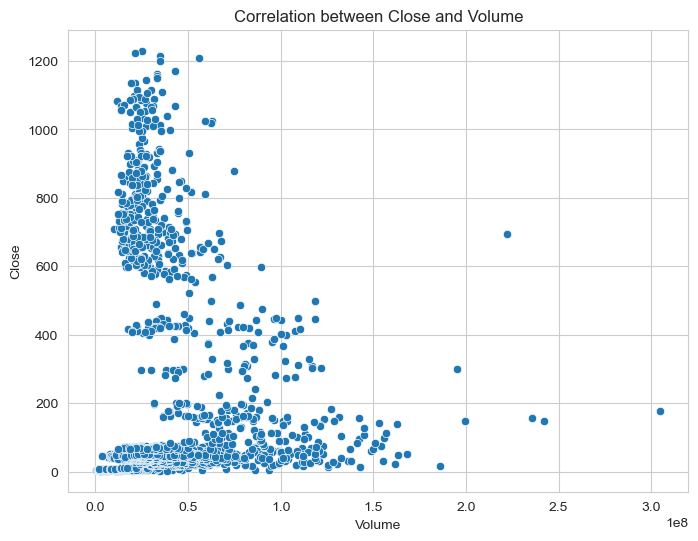

In [21]:
# Create a Seaborn scatter plot to visualize the correlation
# The Seaborn scatter plot helps visualize the correlation between the 'Close' and 'Volume' values. The 
# points in the scatter plot represent the relationship between these two variables, and the overall 
# pattern can indicate the strength and direction of the correlation.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title('Correlation between Close and Volume')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

### 4. Insights for Volume and Close Price Correlation

The correlation coefficient value of 0.0906 suggests a very weak positive linear relationship between the closing   
prices and trading volumes of Tesla's stock. Here are some conclusions and insights that can be drawn from this   
correlation value:

**1. Weak Correlation:** A correlation coefficient close to 0 indicates that there is little to no linear relationship   
between the changes in closing prices and trading volumes. In this case, the value is positive, suggesting that as   
closing prices increase, trading volumes tend to increase slightly as well. However, the correlation is too weak to   
infer any strong connection between the two variables.

**2. Limited Predictive Power:** Since the correlation is weak, it implies that changes in trading volume are not a   
reliable predictor of changes in stock prices, and vice versa. Traders and investors should be cautious about using   
trading volume as a sole indicator for making investment decisions related to Tesla's stock.

**3. External Factors:** Factors beyond trading volume, such as company news, market sentiment, macroeconomic trends,   
and regulatory changes, likely play a more significant role in driving Tesla's stock price movements.

**4. Diverse Market Participants:** The weak correlation could be a result of various market participants with     
different motivations and strategies. Some investors might focus more on short-term price fluctuations, while others   
might prioritize long-term prospects, leading to varying trading behaviors.

**5. Further Analysis Needed:** While the correlation is weak overall, it's important to note that correlation does   
not imply causation. To gain a deeper understanding of the relationship between trading volume and stock prices,   
additional analyses and consideration of other factors would be necessary.

**__________________________________________________________________________________________________________________________________________________**

## **II. Machine Learning and Python**

### **A. Hypothesis**

Build a machine learning model trained on historical data to accurately predict Tesla's stock price, enabling a   
strategic investment approach to optimize wealth accumulation for early retirement.

**Stock Strategy:**

* Purchasing Tesla stock, retaining it over time, and subsequently divesting, in accordance with my financial       
    objectives of optimizing both short-term and long-term wealth accumulation. 
        
* My risk tolerance exhibits an aggressive stance, reflecting my unwavering confidence in Tesla's technological   
    prowess and its pivotal role in the renewable energy sector. 
        
* My overarching objective is to achieve early retirement with a substantial net worth in the realm of seven   
    figures.

### **B. Finding the data**

The Tesla's stock data we're going to be using is found at: [Kaggle](https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021)

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


### **C. Reshaping the data**

In order to make machine learning predictions possible our next step is to:

#### **1. Setting the 'Date' column as the index of our DataFrame** 

Setting the date column as the index is often beneficial for time-series data and can streamline various operations.

* **Time-Series Analysis:** Working with time-series data, setting the date column as the index is often essential.   
Time-series data relies on the chronological order of data points, and having a date-based index allows us to   
perform time-based operations easily.

* **Machine Learning:** In the context of machine learning, setting the date column as the index can affect our   
feature engineering and modeling. It's common to use time-related features, such as day of the week, month, or year,   
in our model. When the date column is set as the index, we can easily extract these features. Additionally, when     
working with time-series forecasting tasks, we may want to use past values (lags) as features, and a date-based   
index makes it straightforward to calculate these.

* **Data Slicing:** When we set the date column as the index, we can use the loc method to slice our data based on   
date ranges. This is valuable for tasks like splitting data into training and testing sets or selecting specific   
time periods for analysis.

In [12]:
import pandas as pd
# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# This line sets the 'Date' column as the index of the DataFrame df in place, allowing for efficient 
#time-series data operations.
df.set_index('Date', inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [13]:
df.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
       '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24'],
      dtype='object', name='Date', length=2956)

#### **2. Visualizing Tesla's stock market data**

Plot the Closing price against the index to get a visual idea of the closing price for Tesla's stock data.

<Axes: xlabel='Date'>

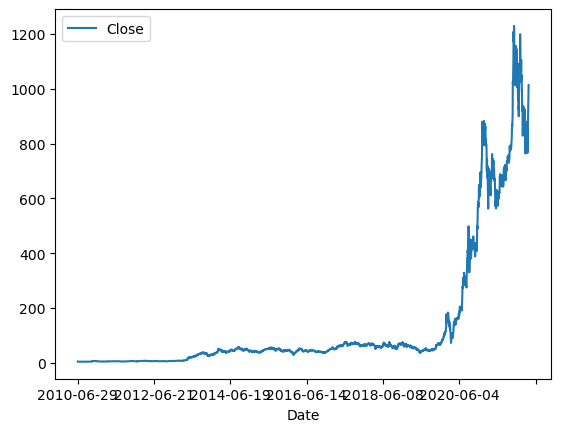

In [14]:
# Showing trading days or the dates on the x-axis and the Close prince on the y-axis
df.plot.line(y='Close', use_index=True)

#### **3. Setting up a target to get predictions using our Machine Learning Model** 

We're not trying to find the absolute price, the 'Open' value', what we're intestested in knowing is the directionality,    
knowing the best time to buy Tesla's stock, knowing if we buy stock will the price go up? 

On days that the stock goes up, can we predict that the stock will go up? This way we'll be certain that when we buy Tesla's   
stock the price will go up. 

Our Target will be, will the stock go up or down, for that we'll need to:

* Create a new column named 'tomorrow', taking the close column and shifting the prices back one day,     
the tomorrow column is the closing price of the previous day.

* Create a new column 'target' to predict price increase (1) or decrease/no change (0)

In [15]:
# Use the 'shift' method to create the 'tomorrow' column
# This code creates a new column 'tomorrow' by shifting the 'Close' prices one day back. So, each 
# row in the 'tomorrow' column represents the closing price of the day after the corresponding row.
df['Tomorrow'] = df['Close'].shift(-1)

# Create a new column 'target' to predict price increase (1) or decrease/no change (0)
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

# Display the DataFrame with the new 'target' column
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.766000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.392000,0
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3.840000,0
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,3.222000,0
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,3.160000,0
...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,921.159973,1
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,993.979980,1
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,999.109985,1


### **D. Cleaning the data**

Since there are no columns with missing values, or any historical data that is too old to make predictions, the   
next step is to eliminate unnecessary columns for our model to work efficiently, in this case the 'Adj Close' column:

The 'Adj Close' column is not directly related to the raw closing prices we're using as predictors.   
It's often a good practice to focus on raw price data when building predictive models, as adjusted   
prices might already reflect past events and could introduce noise or redundancy into our model.

In [16]:
# deletes the 'Adj Close' column
del df['Adj Close']

df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,4.766000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,4.392000,0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,3.840000,0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,3.222000,0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,3.160000,0
...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500,921.159973,1
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200,993.979980,1
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500,999.109985,1


### **E. Building a Machine Learning Model and Splitting the Data**

We're going to use a Random Forest Classifier algorithm, which trains various individual decision trees with   
randomized parameters and then averages the results from those decision trees. 

The 'Open' and 'Target' columns are not linearly correlated, this method picks up on non-linear tendendecies.   


#### **1. Training an initial baseline Machine Learning model**

* **Create a Random Forest Classifier:**   

    * Works well with structured data, including financial data like stock prices

    * Works by training numerous individual decision trees with randomnized parameters, and then     
    averaging the results from those decision trees

    * Resistant to overfitting and run relatively quickly  

    * Capture complex non-linear relationships in the data, which defines most stock data in general  

* **Initialize model and define hyper-parameters:**   
  
    * n_estimators = 100  
    This parameter defines the number of decision trees in the forest. A higher number typically leads to   
    better performance, but it also increases computation time. 100 is a reasonable starting point, but you   
    can experiment with different values to optimize performance.
    
    * min_samples_split = 100   
    This parameter sets the minimum number of samples required to split a node. A higher value prevents   
    the model from splitting nodes too early, potentially reducing overfitting. Again, this value can be   
    adjusted based on cross-validation results.
    
    * random_state = 1  
    This is used for reproducibility. Setting a random seed ensures that the same results are obtained   
    when the code is run again. It doesn't affect model performance.  

* **Split Tesla's stock data into training and testing sets:** 

    For time series data, splitting into training and testing sets remains critical for model evaluation, but the   
    temporal nature of the data introduces challenges like data leakage and requires specific techniques like rolling   
    window or expanding window cross-validation to be applied thoughtfully. Time series cross-validation methods help   
    ensure that the model's performance is assessed realistically with respect to the chronological order of data points.    

    * **Preventing Overfitting:** Random Forests are capable of fitting the training data very closely, which can     
    lead to overfitting. Overfitting occurs when the model learns to memorize the training data rather than     
    capturing underlying patterns. Testing on a separate dataset helps us identify if the model is overfitting.     
    If the model performs well on training data but poorly on the test data, it's a sign of overfitting.    

    * **Hyperparameter Tuning:** We can use the test dataset to tune hyperparameters of the Random Forest, such as   
    the number of trees, tree depth, or minimum samples per leaf. This process, known as cross-validation, helps   
    optimize the model's performance.

    * **Realistic Performance Assessment:** Testing on an independent dataset gives a more realistic assessment of the   
    model's performance. It simulates how the model will behave when it encounters new, unseen data in a production   
    or real-world environment.
    
    * **Temporal Structure:** Time series data has a temporal structure, meaning that data points are ordered by time.   
    This temporal structure should be preserved when splitting the data. Typically, you should use older data for   
    training and more recent data for testing to simulate real-world scenarios where you make predictions about the   
    future based on historical data.

    * **Avoiding Data Leakage:** Data leakage is a more significant concern in time series data. In standard cross-validation,     
    data points are randomly shuffled before splitting into training and testing sets. However, in time series, shuffling   
    can lead to data leakage because future data may inadvertently influence past data. To prevent this, a time-based   
    splitting strategy like "rolling window" or "expanding window" cross-validation should be used.

        * **Rolling Window:** In this approach, you start with an initial training period and a subsequent testing period.    
        As you move forward in time, you expand the training window and shift the testing window accordingly. This simulates   
        making predictions using only past data.

        * **Expanding Window:** Here, you begin with a small training period and gradually include more data for training in 
        each iteration. This helps assess how the model's performance improves with more historical data.

    * **Model Evaluation:** When dealing with time series data, you're often interested in assessing the model's ability to   
    make future predictions. The testing set should contain data points that are chronologically after the training set. 
    This evaluation strategy is more aligned with the real-world application of time series models.

    * **Cross-Validation:** In time series analysis, cross-validation techniques like Time Series Cross-Validation (e.g.,   
    TimeSeriesSplit in scikit-learn) are preferred over standard k-fold cross-validation. These techniques ensure that the   
    temporal structure is maintained during model evaluation.
                                                                      
* **Define predictors:**  

    * It's better to be precise with the columns we want to use to predict the target instead of using all     
    columns, we want a model that works in a real world scenario, if we use the 'tomorrow' or 'target'   
    column the model can act based on imaginary assumptions.  
        
* **Fit the model using the specified predictors:**   

    * Train the machine learning model using the training data (train) and the selected predictors   
    (predictors). It uses the target variable ("target") to learn the relationships between the features   
    and the target variable.  

In [17]:
# Import the RandomForestClassifier library from scikit-learn.
from sklearn.ensemble import RandomForestClassifier

# define hyperparameters for the Random Forest model, such as the number of estimators 
# (trees in the forest), minimum samples required to split a node, and a random seed for 
# reproducibility.
n_estimators = 100
min_samples_split = 100
random_state = 1

# initiate model, create an instance of the Random Forest Classifier with the specified 
# hyperparameters.
model = RandomForestClassifier(
    n_estimators=n_estimators,
    min_samples_split=min_samples_split,
    random_state=random_state
)

# divide our dataset ('df') into two parts: 'train' and 'test.'
train = df.iloc[:-100]  # All rows except the last 100
test = df.iloc[-100:]  # The last 100 rows

# specifies which columns from our dataset will be used as predictors
predictors = ["Close", "Volume", "Open", "High", "Low"]

# train the Random Forest model using the 'train' dataset and the selected predictors. 
# The model is fitted to the historical data to learn patterns and relationships between 
# the features and the target variable, which is assumed to be "target."
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

### **E. Finding an error metric**

#### **1. Measuring how accurate our Machine Learning Model is**

* **Calculating a precision score**
    
    After the model is trained, we want to measure how accurate the model is, this line generates predictions on the   
    test data (test) using the same set of predictors (predictors). These predictions represent what the model thinks   
    the target variable should be for each data point in the test set.

In [18]:
from sklearn.metrics import precision_score
import pandas as pd

# Use the trained model to generate predictions
preds = model.predict(test[predictors])

# Converts the predictions (a NumPy array) into a pandas Series, 
# ensuring it has the same index as your test data.
preds = pd.Series(preds, index=test.index)

precision_score(test["Target"], preds)

0.4897959183673469

* **Plotting our Predictions**

<Axes: xlabel='Date'>

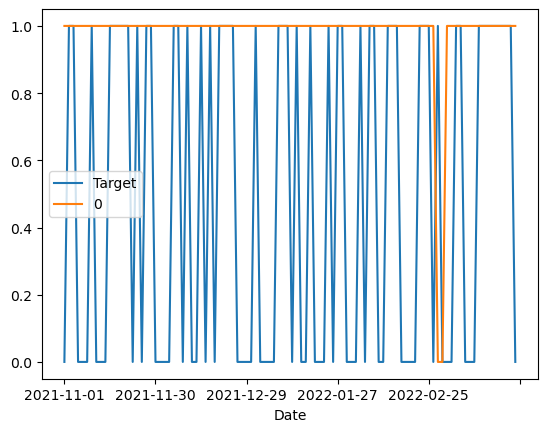

In [19]:
# Combine actual values and predictions
combine = pd.concat([test["Target"], preds], axis=1)
combine.plot()

#### **2. Insights based on our predictions**

In the plot the yellow line predicted the market would go up but the blue line shows that it mostly went down   
making our predictions not accurate. 

A precision score of approximately 48.98% indicates that when your model predicts a price increase       
(i.e., target = 1), it's correct about 48.98% of the time. In other words, when our model suggests buying a   
stock, it's accurate about 48.98% of the time in predicting that the price will indeed go up.    

Here's how we can interpret this precision score and how it might influence our trading decisions:  

* **Accuracy of Predictions:** With a precision score of 48.98%, your model's predictions are correct roughly   
half of the time when it suggests buying stocks. This suggests that while the model has some predictive power,   
it's not highly accurate.

* **Trading Strategy:** Given this precision score, you might consider a cautious trading strategy.     
For example:

    * **Risk Management:** Implement strict risk management practices. Only allocate a portion of your     
    portfolio to the trades suggested by the model.

    * **Diversification:** Diversify your portfolio to spread risk. Don't put all your funds into a   
    single trade.

    * **Continuous Monitoring:** Continuously monitor the model's performance. If you notice a   
    significant decline in accuracy, consider retraining the model with updated data or revising   
    your trading strategy.

* **Decision Support:** While the precision score suggests that the model is not highly accurate, it   
can still provide valuable decision support. You can use its predictions as one of several factors in   
your overall trading strategy.

* **Refinement:** Consider refining your model or exploring different machine learning algorithms to   
improve prediction accuracy. Additionally, you can experiment with different sets of features or   
indicators to enhance the model's performance.

It's important to remember that trading in financial markets involves inherent risks, and machine learning   
models are tools that can assist in decision-making but should not be solely relied upon. Always use our   
best judgment, conduct thorough research, and consider multiple factors before making trading decisions.

### **G. Backtesting our model**

A more robust way to test our algorithm across multiple years.

#### **1. Create a prediction function:**

This function trains a machine learning model, generates predictions on a test dataset, and combines the   
actual and predicted values into a DataFrame for further analysis and evaluation of the model's accuracy.

In [20]:
def predict(train, test, predictors, model):
    
    # Fit the model to the training data
    model.fit(train[predictors], train["Target"])
    
    # Generate predictions on the test data
    preds = model.predict(test[predictors])
    
    # Create a pandas Series for predictions with the same index as the test data
    # Here, the predicted values (preds) are converted into a pandas Series. This 
    # Series will have the same index as the test data, ensuring that each prediction 
    # aligns with the corresponding test data point. It's given the name "Predictions" for clarity.
    preds = pd.Series(preds, index=test.index, name="Predictions")
    
    # Combine actual values and predictions into a DataFrame
    # This line combines the actual target values from the test data (test["target"]) and the 
    # predicted values (preds) into a single DataFrame called combined. The axis=1 parameter 
    # indicates that the concatenation should be done column-wise, so you get two columns: one for 
    # actual values and one for predicted values.
    combined = pd.concat([test["Target"], preds], axis=1)
    
    return combined

#### **2. Creating a rolling window backtest function:**

In a rolling window backtest, the model is trained on a fixed window of historical data, and then the window   
is moved forward in time to include the next period of data for training and testing. This process continues   
iteratively until it reaches the end of the dataset.    
  
* **This function:**

    * Starts with the initial training window, defined by start_value (in this case, 2500) which corresponds to the   
    first 10 years of data.

    * Moves the window forward by step_value time units (in this case, 250, which is approximately one year), training   
    the model on the extended window and making predictions for the next period.

    * This process is repeated until the end of the dataset is reached.

* **Here's why it's important to start with the first 10 years and gradually increase the training data:**

    * **Learning Patterns:** Training the model on the first 10 years allows it to learn the underlying   
    patterns and trends in the data. Stock market data often has complex patterns and dependencies, and   
    starting with more historical data helps the model capture these patterns.

    * **Generalization:** By gradually increasing the training data, the model is exposed to a variety of market  
    conditions. This helps it generalize better when making predictions on unseen data. If you were to train it  
    with only a year's worth of data, it might not capture the long-term trends and could be more prone to  
    overfitting (fitting the noise in the data rather than the actual patterns).

    * **Stability:** Starting with a larger training window provides stability to the initial model. Training a  
    machine learning model with a very small amount of data can lead to erratic predictions, as it might  
    overreact to small fluctuations in the data.

    * **Accuracy:** While training with only a year's data may yield some predictions, these might be less accurate  
    because the model hasn't had the opportunity to learn the full range of market behaviors over time.

    In essence, starting with more historical data is a common practice to build a strong foundation for the model,  
    allowing it to learn and understand the historical patterns and trends in the stock data. While we can train  
    models with shorter windows, it often results in less accurate predictions, especially for time series data where  
    historical context is crucial for making informed forecasts.

* **The backtest function takes several parameters:**   

    * **df:** the DataFrame containing the data 

    * **model:** the machine learning model we want to use for predictions 
                                                          
    * **predictors:** the list of predictor columns = ["Close", "Volume", "Open", "High", "Low"] 

    * **two parameters:** start_value and step_value.

        * **start_value:** Determines the starting point from where to begin generating training   
        and testing sets. In this function, it is set to a default value of 2500. This means   
        that by default, it starts from the 2500th data point in our DataFrame. 

            Since every trading year has about 250 days, this takes the first 10 years to train the model. 

        * **step_value:** Defines the step size or interval between consecutive training and testing   
        sets. In this function, it is set to a default value of 250. This means that after each   
        iteration of the for loop, you move forward by 250 data points in your DataFrame.

            The step_value trains the model for a year, 250, and then moves on to the next year and so on.  
            It takes the first 10 years then predicts the 11th year, then takes the first 11 years and then  
            predicts the 12th year, and so on. This way we get confidently get predictions for many years. 

In [22]:
def backtest(df, model, predictors, start_value=2500, step_value=250):
    
    # This line initializes an empty list named all_predictions. This list will be used to store 
    # the predictions made during the backtesting process.
    all_predictions = []

    #This line starts a for loop that iterates over a range of indices. The loop begins at the 
    # index specified by the start_value parameter and continues until it reaches the end of the 
    # DataFrame (df) while incrementing by the step_value.
    for i in range(start_value, df.shape[0], step_value):

        # Inside the loop, this line creates a new DataFrame named train. It uses the iloc method to 
        # select the rows from index 0 up to (but not including) the current value of i from the 
        # original DataFrame df. The .copy() method is used to ensure that a new DataFrame is created, 
        # preventing modifications to affect the original data.
        train = df.iloc[0:i].copy()

        # Similarly, this line creates another DataFrame named test. It selects rows from index i up 
        # to (but not including) i + step from the original DataFrame df. Again, .copy() is used to 
        # create a new DataFrame.
        test = df.iloc[i:(i+step_value)].copy()

        # Debugging: Print the range of rows used for training and testing
        print(f"Training rows: 0 to {i}")
        print(f"Testing rows: {i} to {i + step_value}")

        # This line calls the predict function with the train and test DataFrames, the list of 
        # predictors, and the machine learning model. It generates predictions for the test dataset 
        # based on the train dataset.
        predictions = predict(train, test, predictors, model)

        # Debugging: Print the shape of predictions DataFrame
        print(f"Predictions shape: {predictions.shape}")

        # After making predictions for the current test dataset, the predictions are appended to the 
        # all_predictions list. This list will contain predictions for different time periods as the 
        # loop iterates.
        all_predictions.append(predictions)

     # Debugging: Print the length of all_predictions
    print(f"Number of predictions: {len(all_predictions)}")

    # Finally, once the loop completes, this line concatenates all the prediction DataFrames stored 
    # in all_predictions into a single DataFrame using pd.concat(). The function then returns this 
    # concatenated DataFrame, which contains predictions for various time periods during the 
    # backtesting process.
    return pd.concat(all_predictions)

#### **3. Calling the backtest function:**

This line calls the backtest function with our financial market data (df), trained machine learning model (model),   
and selected predictors, storing the resulting predictions in the predictions variable for further analysis.

In [24]:
# Generates predictions applying the trained model to different historical windows of data to evaluate 
# its performance
predictions = backtest(df, model, predictors)

Training rows: 0 to 2500
Testing rows: 2500 to 2750
Predictions shape: (250, 2)
Training rows: 0 to 2750
Testing rows: 2750 to 3000
Predictions shape: (206, 2)
Number of predictions: 2


#### **4. Evaluating the error of our predicions:**

This line is counting and displaying the frequency of different prediction values (whether the market   
will go up or down) made by the model in the backtest, helping to assess the model's performance in terms   
of its predictions.

In [25]:
# The code is calculating and displaying the count of each unique prediction value made by the model, 
# showing how many times each prediction occurred in the dataset.
predictions["Predictions"].value_counts()

Predictions
0    436
1     20
Name: count, dtype: int64

#### **5. Insights based on the frequency of our predictions:**  
    
* 0 = The market went down 436 days    
* 1 = The market went up 20 days

* **Class Imbalance:** The majority of the predictions fall into class 0 (the market went down),  
    with 436 instances. In contrast, class 1 (the market went up) has only 20 instances. This suggests a  
    class imbalance issue in our dataset, where one class (market down) is significantly more prevalent  
    than the other (market up).  

* **Prediction Bias:** The large number of predictions for class 0 might indicate that our model tends  
    to predict the market going down more frequently. This could imply a bias in our model's predictions,  
    where it might be conservative or risk-averse in predicting market upturns.

* **Model Evaluation:** We can use these counts to calculate metrics such as accuracy, precision, recall,  
    and F1-score to get a more comprehensive assessment of your model's performance. Precision, in particular,  
    will be crucial, as it tells you how well your model predicts positive cases (market going up) out of all  
    the cases it predicts as positive. Given the class imbalance, precision is a valuable metric to focus on.

* **Model Improvement:** If predicting market upturns is of high importance for your financial strategy,  
    we may need to address the class imbalance issue. Techniques like resampling (e.g., oversampling the  
    minority class), adjusting class weights, or exploring different algorithms may help improve our model's  
    performance, especially in capturing market upswings accurately.

In summary, while the counts alone provide some insights, we should perform a more detailed evaluation of our  
model using appropriate metrics to gauge its effectiveness in capturing the patterns in our financial data.  
Addressing class imbalance and bias may be necessary for more accurate predictions.

#### **6. Evaluating precision score and performance of our machine learning model**

The precision score focuses on how well the model predicts positive outcomes (e.g., market going up). It   
measures the proportion of true positives (correctly predicted up days) among all positive predictions   
(total predicted up days).

* **Importance of Precision:**

    * **Performance Evaluation:** Precision is a metric that measures the accuracy of positive predictions made     
    by a classification model. In your case, it helps you assess how accurate your model's predictions are     
    when it predicts that the market will go up (positive class).

    * **Relevance to Financial Decisions:** Precision is particularly important in financial applications like  
    stock price prediction. A high precision score indicates that when your model predicts an upward movement  
    in the market, it tends to be correct, which can be crucial for making investment decisions.

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7

#### **7. Insights based on our Precision Score**

* **Interpreting our Precision Score:**

    A precision score of 0.70 means that, on average, when our model predicts that the market will go   
    up (1), it is correct approximately 70% of the time. 

* **Here's the breakdown:**   

    * Out of all the days our model predicted the market would go up (1), it was correct 70% of the time.  
 
    * Conversely, it means that when our model predicted the market would go down (0), it was incorrect 30%  
    of the time.  

This precision score indicates the quality of positive predictions made by our model. In the context of   
stock market predictions, a precision score of 0.70 suggests that our model is reasonably accurate when   
it predicts upward market movements.

#### **8. Evaluating our percentage of Up/Down days**

Determining the percentage of days when the market actually went up (target = 1) and when it went down   
(target = 0) based on the predictions made by our machine learning model.

This provides insights into the model's ability to correctly predict market movements and how it compares   
to random chance. It helps in understanding the distribution of predicted classes (up and down) in comparison   
to the actual distribution in the data.

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.552632
0    0.447368
Name: count, dtype: float64

#### **9. Insights based on the percentage of Up/Down days**

This metric provides an insight into the overall distribution of up and down days in the dataset, taking   
into account both true positives and false negatives. 

* **Market Up Days:** (target 1) 55.26%

* **Market Down Days:** (target 0) 44.74%; the model issued a "buy" signal, but the market didn't follow   
    the prediction.

* **Class Imbalance Confirmation:** These percentages confirm the class imbalance in your dataset. The   
    market up days (target 1) account for approximately 55.26% of the total days, while the market down days   
    (target 0) make up about 44.74%. This reiterates that market up days are less frequent in your data compared   
    to market down days.

* **Model's Bias:** The class imbalance may also contribute to a potential bias in your machine learning model.   
    Given that there are fewer instances of market up days, the model might struggle to predict them accurately,   
    leading to a lower precision score for predicting market upturns.

* **Trading Strategy Consideration:** Understanding these percentages is crucial for shaping your trading strategy.   
    If your strategy relies heavily on predicting and capitalizing on market upturns, the relatively lower percentage   
    of such days might pose a challenge. You might need to adjust your strategy to account for this imbalance or consider   
    techniques to enhance your model's ability to identify market upswings.

* **Model Evaluation:** These percentages can serve as a benchmark for evaluating your model's performance. You can   
    use metrics like precision, recall, and F1-score to measure how well your model predicts market up days compared   
    to market down days. It's essential to strike a balance between accurately predicting both types of days.

In summary, these percentages provide a clear view of the class distribution in your dataset and highlight the challenges   
associated with predicting market up days. They should guide you in refining your trading strategy and assessing the   
performance of your machine learning model. Addressing class imbalance may be necessary to improve predictions for less   
frequent events, such as market upturns.

### **H. Feature Engineering**

#### **1. Adding more predictors within a specified window [2,5,60,250,1000 days] to improve accuracy:**

* Create a list called "horizons" to specify different time periods for calculating rolling averages.

* Create an empty list named "new_predictors" to store the names of the new predictor columns.

* Create a loop that iterates over each time period (horizon) in the "horizons" list.

    * For each horizon, calculate rolling averages of the 'Close' price column, and take the mean. 

    * Create new columns: ratio_column and a trend_column and add them to our Tesla dataframe.
        
        * "Close_Ratio_.." the 'Close' price divided by our rolling average; the loop calculates the ratio   
        between today's 'Close' and the average 'Close' in the last: [2,5,60,250,1000 days]..  
        
        * "Trend_.." column captures the cumulative count of "up" days within our rolling window; the number  
        of days in the past: [2,5,60,250,1000 days] that the stock price actually went up, and then it  
        shifts forward and finds the rolling sum of the 'target' column.
        
    * The names of the new features are appended to the "new_predictors" list.  

In [42]:
# A list called horizons, which contains window sizes for calculating rolling statistics. 
# These horizons represent various periods over which we want to compute features for your model.
horizons = [2, 5, 60, 250, 1000]

# Initializes an empty list called new_predictors to store the names of the newly calculated predictor columns.
new_predictors = []

# Initiates a loop that iterates over each value (horizon) in the horizons list
# This loop allows us to calculate features for each specified time horizon.
for horizon in horizons:

    # Debugging: Print the current horizon value
    print(f"Calculating for horizon: {horizon}")

    # Calculate rolling averages for the 'Close' price over the specified horizon period using the Pandas rolling() 
    # function. This line calculates the mean of the 'Close' price within a rolling window of size horizon. It 
    # creates a DataFrame (rolling_averages) with these rolling averages.
    rolling_averages = df.rolling(horizon).mean()

    # Debugging: Print the shape of rolling_averages DataFrame
    print(f"Shape of rolling_averages: {rolling_averages.shape}")

    # Define a unique column name for a calculated ratio feature based on the current time horizon.
    ratio_column = f"Close_Ratio_{horizon}"

    # Debugging: Print the ratio_column name
    print(f"Creating column: {ratio_column}")

    # Calculates a new feature representing the ratio between the 'Close' price and the rolling average calculated 
    # for the given horizon. This ratio measures how the current 'Close' price compares to the historical average 
    # within the specified window. Using the .loc indexer to avoid the 'settingwithcopywarning'.
    df.loc[:, ratio_column] = df["Close"] / rolling_averages["Close"]

    # Debugging: Print the shape of df DataFrame after adding the ratio column
    print(f"Shape of df after adding {ratio_column}: {df.shape}")

    # Defines a column name for the trend feature based on the current horizon.
    trend_column = f"Trend_{horizon}"

    # Debugging: Print the trend_column name
    print(f"Creating column: {trend_column}")

    # Compute a trend feature that represents the cumulative sum of the 'target' column within a rolling window of 
    # size horizon. This feature captures the historical trend in market direction over the specified period.
    # Using the .loc indexer to avoid the 'settingwithcopywarning'.
    df.loc[:, trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    # Debugging: Print the shape of df DataFrame after adding the trend column
    print(f"Shape of df after adding {trend_column}: {df.shape}")

    # Append the newly created ratio_column and trend_column names to the new_predictors list, making them available 
    # as additional predictors for our machine learning model.
    new_predictors += [ratio_column, trend_column]

# Debugging: Print the list of new predictors
print("New predictors:", new_predictors)

Calculating for horizon: 2
Shape of rolling_averages: (2956, 17)
Creating column: Close_Ratio_2
Shape of df after adding Close_Ratio_2: (2956, 17)
Creating column: Trend_2
Shape of df after adding Trend_2: (2956, 17)
Calculating for horizon: 5
Shape of rolling_averages: (2956, 17)
Creating column: Close_Ratio_5
Shape of df after adding Close_Ratio_5: (2956, 17)
Creating column: Trend_5
Shape of df after adding Trend_5: (2956, 17)
Calculating for horizon: 60
Shape of rolling_averages: (2956, 17)
Creating column: Close_Ratio_60
Shape of df after adding Close_Ratio_60: (2956, 17)
Creating column: Trend_60
Shape of df after adding Trend_60: (2956, 17)
Calculating for horizon: 250
Shape of rolling_averages: (2956, 17)
Creating column: Close_Ratio_250
Shape of df after adding Close_Ratio_250: (2956, 17)
Creating column: Trend_250
Shape of df after adding Trend_250: (2956, 17)
Calculating for horizon: 1000
Shape of rolling_averages: (2956, 17)
Creating column: Close_Ratio_1000
Shape of df aft

In [31]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,4.766000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,4.392000,0,0.998743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,3.840000,0,0.959161,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,3.222000,0,0.932945,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,3.160000,0,0.912489,0.0,0.767216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500,921.159973,1,1.019015,2.0,1.081584,4.0,0.968285,28.0,1.114740,134.0,2.630046,529.0
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200,993.979980,1,1.008634,2.0,1.061178,5.0,0.986693,28.0,1.132534,135.0,2.669105,530.0
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500,999.109985,1,1.038023,2.0,1.096537,5.0,1.066083,28.0,1.219942,135.0,2.872278,530.0


#### **2. Getting rid of extra NaN (Not-a-Number) columns and addressing error:** 

NaN results when Pandas can't find days or rows prior to the current row to calculate a rolling average or rolling   
sum of the 'target' column.

This algorithm avoids data leakage by calculating features only from past data and shifting the target variable to   
prevent using future information during training.

* **Rows with NaN value causing 'No Objects to concatenate error':**

First I tried removing rows by using **'df = df.dropna()'** which caused an error in the predict and backtest functions:         
'No objects to concatenate'. When I removed these rows it may've lead to a loss of information and valuable data points.

I then used **'df.fillna(df.mean(), inplace=True)'** which doesn't eliminate NaN rows but fills in missing values with  
the mean of each column, ensuring that there were no missing values when I later attempted to concatenate DataFrames.

**Here's how it helped:**

* **Filling Missing Values:** fillna(df.mean()) replaces all NaN values in the DataFrame with the mean of their respective   
columns. This action transforms the DataFrame by replacing missing data with reasonable estimates based on the column   
means. As a result, you no longer have missing values in your DataFrame.

* **Clean Data:** The absence of missing values means that when you use pd.concat to concatenate DataFrames, there are no NaN   
values or mismatches in the indices that would trigger the "No objects to concatenate" error.

* **In-Place Modification:** By using inplace=True, you modified the DataFrame df itself without the need to create a new   
DataFrame. This means that df now contains the filled values, and any subsequent operations, including concatenation,   
will use this modified DataFrame.

In summary, filling missing values with column means made our data more complete and suitable for concatenation,   
resolving the error. However, it's important to note that this method fills in missing data with a central tendency   
measure (the mean) and may not be suitable for all datasets or analysis scenarios. The choice of how to handle missing   
data depends on the nature of our data and the goals of our analysis.


In [32]:
# 'fillna(df.mean())' replaces all NaN values in the DataFrame with the mean of their respective columns
df.fillna(df.mean(), inplace=True)

In [33]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,4.766000,0,1.000906,1.036222,1.003947,2.590647,1.062089,31.103246,1.289828,129.362158,2.136741,514.433538
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,4.392000,0,0.998743,1.036222,1.003947,2.590647,1.062089,31.103246,1.289828,129.362158,2.136741,514.433538
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,3.840000,0,0.959161,0.000000,1.003947,2.590647,1.062089,31.103246,1.289828,129.362158,2.136741,514.433538
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,3.222000,0,0.932945,0.000000,1.003947,2.590647,1.062089,31.103246,1.289828,129.362158,2.136741,514.433538
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,3.160000,0,0.912489,0.000000,0.767216,2.590647,1.062089,31.103246,1.289828,129.362158,2.136741,514.433538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500,921.159973,1,1.019015,2.000000,1.081584,4.000000,0.968285,28.000000,1.114740,134.000000,2.630046,529.000000
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200,993.979980,1,1.008634,2.000000,1.061178,5.000000,0.986693,28.000000,1.132534,135.000000,2.669105,530.000000
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500,999.109985,1,1.038023,2.000000,1.096537,5.000000,1.066083,28.000000,1.219942,135.000000,2.872278,530.000000


### **I. Hyper-parameter Tuning**

#### **1. Redefining hyper-parameters for the Random Forest Algorithm:**
                             
* Increase number of n_estimators (trees in the forest) to 200
* Reduce the minimum samples required to split a node to 50, potentially allowing the model to capture   
    more complex patterns in the data

In [35]:
# Import the RandomForestClassifier library from scikit-learn.
from sklearn.ensemble import RandomForestClassifier

# Redefine hyperparameters for the Random Forest model, such as the number of estimators 
# (trees in the forest), minimum samples required to split a node, and a random seed for 
# reproducibility.
n_estimators = 200
min_samples_split = 50
random_state = 1

# initiate model, create an instance of the Random Forest Classifier with the specified 
# hyperparameters.
model = RandomForestClassifier(
    n_estimators=n_estimators,
    min_samples_split=min_samples_split,
    random_state=random_state
)

#### **2. Predict Function Refinement:**

Rewrite the predict function, incorporating new features and improvements based on your findings.

In the previous version when we ran model.predict(test[predictors]), we got 0 or 1. What we want  
is more control over how we define what becomes 0 or 1. 

* We'll use the model.predict_proba method which will return a probability that the row will be 0 or 1,  
a probability that the stock price will go up or down tomorrow.

* We'll get the 2nd column, which will be the probability the stock price goes up

* Then we'll set our custom threshold (by default 0.5) to 0.6, which means that if there is a 60% chance   
or greater, the model will return that the stock will go up. 

**Essentially what this modified model will do is:**

* Reduce the number of Up predictions (1)
* Make the model more confident the stock will go up in order to show that it'll go up
* Reduce the total number of trading days but increase the chance of the price going up.   
We don't want to trade everyday, we want to trade when we are certain the price goes up. 

Also, due to error I was getting after running this:'No Obejcts to concatenate', it was neccessary to make this   
predict function more robust: including error checking and handling for missing data, ensuring that our prediction   
process is more resilient to unexpected situations, such as missing data, and providing informative error messages   
if issues occur during prediction. This can be particularly helpful for debugging and understanding the root cause   
of any problems in our data or code, and along with handling the NaN adequaly it helped to remove the error. 

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def predict(train, test, predictors, model):
    try:
        # Check if the required columns exist in both train and test
        missing_columns = set(predictors) - set(train.columns) - set(test.columns)
        if missing_columns:
            raise ValueError(f"Missing columns in train and test data: {missing_columns}")

        # Fit the model to the training data
        model.fit(train[predictors], train["Target"])
        
        # Check if the model has been trained successfully
        if not hasattr(model, "predict_proba"):
            raise ValueError("The model does not have a 'predict_proba' method.")

        # Predict the probabilities of class 1 (stock price going up)
        preds = model.predict_proba(test[predictors])[:, 1]

        # Check if there are any missing predictions
        if pd.isnull(preds).any():
            raise ValueError("There are missing predictions.")

        # Apply a custom threshold (e.g., 0.6) to make predictions
        preds[preds >= 0.6] = 1
        preds[preds < 0.6] = 0

        # Create a DataFrame with the predictions
        preds = pd.Series(preds, index=test.index, name="Predictions")
        
        # Combine actual target values and predictions
        combined = pd.concat([test["Target"], preds], axis=1)
        
        return combined
    except Exception as e:
        print(f"Error in predict function: {str(e)}")
        return None  # Return None to indicate an error

#### **3. Backtesting Iteration:**

Calling the backtest function again to evaluate the updated model's performance and accuracy.**

* Eliminating our previous predictors: ["Close", "Volume", "Open", "High", "Low"], since they're absolute values,  
which are not very informative in predicting the stock going up. 

* Calling our new_predictors: 'Close_Ratio..' and 'Trend_..'; which are helpful ratios informing what is the price   
today compared to the price yesterday compared to the price last week. 

In [37]:
# generate predictions using a machine learning model and a specified set of predictors by calling the 
# "backtest" function and storing the results in the "predictions" variable.
predictions = backtest(df, model, new_predictors)

Training rows: 0 to 2500
Testing rows: 2500 to 2750
Predictions shape: (250, 2)
Training rows: 0 to 2750
Testing rows: 2750 to 3000
Predictions shape: (206, 2)
Number of predictions: 2


In [38]:
# count the occurrences of unique values in the "Predictions" column of the DataFrame "predictions."
predictions["Predictions"].value_counts()

Predictions
0.0    454
1.0      2
Name: count, dtype: int64

In [39]:
# calculate the precision score by comparing the "Target" column with the "Predictions" column in the DataFrame "predictions."
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [40]:
# calculate the relative frequency (proportion) of each unique value in the "Target" column of the DataFrame "predictions."
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.552632
0    0.447368
Name: count, dtype: float64

In [41]:
predictions

,Target,Predictions
Date,,
2020-06-04,1,0.0
2020-06-05,1,0.0
2020-06-08,0,0.0
2020-06-09,1,0.0
2020-06-10,0,0.0
...,...,...
2022-03-18,1,0.0
2022-03-21,1,0.0
2022-03-22,1,0.0


### **J. Comparison of results using different values for our rolling window backtest**

The backtest function iterates over different time periods within a DataFrame, creating training and testing datasets,   
generating predictions using a machine learning model, and returning a concatenated DataFrame containing predictions for   
various time periods during the backtesting process.

These results included are based on the 2 different predictions functions used:

* **The first Predict Function:** Fits a machine learning model to training data, generates predictions on test data,   
and returns a DataFrame combining actual and predicted values.

* **The second Predict Function:** Additionally checks for missing columns in the train and test data, verifies that   
the model has a 'predict_proba' method, predicts probabilities of class 1, applies a custom threshold for binary   
predictions, and handles potential errors with informative messages.

#### **1. Backtest with a start_value=2500 and step_value=250:**

* **With first prediction function:**

    * Predictions:  
    0 = 436 days  
    1 = 20 days  

    * Precision score: 0.7

    * Percentage of Up/Down predictions:   
    Target  
    1    0.55    
    0    0.45

Our model predicted that the market would go down on 436 days and go up on 20 days. The precision score for this     
version is 0.7, indicating a relatively good balance between true positives and false positives. The percentage of    
predicted up days is balanced between Up and Down predictions, this can be a good sign, as it suggests that our   
model is not overly conservative or aggressive in its predictions.

* **With second Predict Function + Feature Engineering + Redifinition of Hyper-parameters:**

    * Predictions:  
    0 = 454 days  
    1 = 2 days  

    * Precision score: 0.5

    * Percentage of Up/Down predictions:   
    Target  
    1    0.55  
    0    0.45

With the addition of horizons and new predictors and using specific hyperparameters, your model predicted 454 down       
days and 2 up days. The percentage of predicted up days is balanced between Up and Down predictions, this can be a   
good sign, as it suggests that our model is not overly conservative or aggressive in its predictions.

#### **2. Backtest with a start_value=1000 and step_value=100:**

* **With first Predict Function:** 

    * Predictions:  
    0 = The market went down 1692  
    1 = The market went up  264  

    * Precision score: 0.52  

    * Percentage of Up/Down predictions:  
    Target  
    1    0.52  
    0    0.48

Our model predicted that the market would go down on 1692 days and go up on 264 days. The precision score is 0.52,     
indicating a balanced but not very high precision. The percentage of predicted up days is balanced between Up and 
Down predictions, this can be a good sign, as it suggests that our model is not overly conservative or aggressive in 
its predictions.

* **With second Predict Function + Feature Engineering + Redifinition of Hyper-parameters:** 

    * Predictions:    
    0 = 1600  
    1 = 356  

	* Precision score: 0.52  

    * Percentage of Up/Down predictions:  
	Target  
    1    0.52  
    0    0.48  

With the addition of horizons and new predictors, your model predicted 1600 down days and 356 up days. The precision     
score remained the same at 0.52. The percentage of predicted up days is actually very close to the percentage of actual   
up days (around 50%). There isn't a tendency to predict more down days in this case. The model is providing predictions     
that are relatively balanced between up and down days.

#### **3. Backtest with a start_value=500 and step_value=250:**

* **With first Predict Function:** 

    * Predictions:  
    0 = 2267    
    1 = 189    
	
	* Precision score: 0.52  

	* Percentage of Up/Down predictions:  
	Target  
    1    0.52  
    0    0.48

Our model predicted 2267 down days and 189 up days. The precision score is 0.52, similar to the second scenario above.     
The percentage of predicted up days is actually very close to the percentage of actual up days (around 50%). There   
isn't a tendency to predict more down days in this case. The model is providing predictions that are relatively   
balanced between up and down days.

* **With second Predict Function + Feature Engineering + Redifinition of Hyper-parameters:**

    * Predictions:    
    0 = 1980      
    1 = 476    

    * Precision score: 0.51  

    * Percentage of Up/Down predictions:  
    Target  
    1    0.52  
    0    0.48
           
With horizons and new predictors, your model predicted 1980 down days and 476 up days. The precision score dropped   
slightly to 0.51. The percentage of predicted up days is actually very close to the percentage of actual up days   
(around 50%). There isn't a tendency to predict more down days in this case. The model is providing predictions   
that are relatively balanced between up and down days.

### **K. Conslusion of our Backtests**

The analysis of different rolling window backtest scenarios reveals that our model tends to provide predictions   
that are relatively balanced between up and down market movements, and there isn't a strong tendency to predict more   
of one over the other. 

Precision scores vary slightly across scenarios, but they generally indicate a decent balance between true positives     
and false positives, suggesting that your model maintains a reasonable predictive performance. However, the precision     
scores are not exceptionally high, indicating that there is room for improvement in distinguishing between market ups   
and downs.

### **L. Next Steps to Improve my Machine Learning Model**

**1. Feature Engineering:** I will continue to explore and engineer additional features that could provide     
    valuable information for predicting Tesla's stock price. This includes experimenting with technical   
    indicators, sentiment analysis, and external economic indicators.

**2. Hyperparameter Tuning:** I will fine-tune the hyperparameters of the Random Forest Classifier and other    
    machine learning models. Techniques like grid search or random search will be used to find the best     
    hyperparameter combinations.

**3. Model Selection:** I will experiment with different machine learning algorithms beyond Random Forest, such   
    as Gradient Boosting, Support Vector Machines, and Neural Networks, to capture diverse patterns in the data.

**4. Ensemble Methods:** I will explore ensemble methods like stacking to combine predictions from multiple   
    machine learning models, potentially improving overall performance.

**5. Time Series Analysis:** I will apply time series analysis techniques to capture temporal dependencies in the   
    data, including autoregressive models and recurrent neural networks.

**6. Feature Scaling and Normalization:** Ensuring proper feature scaling and normalization is crucial for model   
    convergence and performance. Various scaling techniques will be applied as needed.

**7. Regularization:** I will implement regularization techniques such as L1 and L2 regularization to prevent   
    overfitting and improve model generalization.

**8. Cross-Validation:** Robust cross-validation techniques will be used to assess model performance accurately   
    and prevent overfitting.

**9. Monitoring and Updating:** Continuous monitoring of the model's performance in a production environment will   
    be maintained. The model will be updated as new data becomes available to adapt to changing market dynamics.

**10. Documentation and Reporting:** Thorough documentation of the model, its performance, and the decision-making   
    process will be maintained. This documentation will be valuable for analysis and compliance purposes.

These strategies will be instrumental in enhancing the predictive accuracy and robustness of my machine learning model   
for Tesla's stock price prediction.